In [1]:
$pip install jupyter

SyntaxError: invalid syntax (<ipython-input-1-1d089836fe61>, line 1)

In [3]:
pip install plotly==4.12.0

     |████████████████████████████████| 13.1 MB 6.2 MB/s eta 0:00:01
  Attempting uninstall: plotly
    Found existing installation: plotly 4.9.0
    Uninstalling plotly-4.9.0:
      Successfully uninstalled plotly-4.9.0
Note: you may need to restart the kernel to use updated packages.


In [7]:

!jupyter labextension install jupyterlab-plotly@4.12.0

Building jupyterlab assets (build:prod:minimize)


In [8]:
!jupyter labextension install @jupyter-widgets/jupyterlab-manager plotlywidget@4.12.0

Building jupyterlab assets (build:prod:minimize)


# Imports
---

In [431]:
import pandas as pd
import numpy as np
import plotly.express as px

In [441]:
df = pd.read_excel("./Datasets/PoliceShooting.xlsx")


In [10]:
df.dtypes

Victim's name                                                                                                                                                                         object
Victim's age                                                                                                                                                                          object
Victim's gender                                                                                                                                                                       object
Victim's race                                                                                                                                                                         object
URL of image of victim                                                                                                                                                                object
Date of Incident (month/day/year)                      

In [11]:
df.columns

Index(['Victim's name', 'Victim's age', 'Victim's gender', 'Victim's race',
       'URL of image of victim', 'Date of Incident (month/day/year)',
       'Street Address of Incident', 'City', 'State', 'Zipcode', 'County',
       'Agency responsible for death', 'ORI Agency Identifier (if available)',
       'Cause of death',
       'A brief description of the circumstances surrounding the death',
       'Official disposition of death (justified or other)',
       'Criminal Charges?',
       'Link to news article or photo of official document',
       'Symptoms of mental illness?', 'Unarmed/Did Not Have an Actual Weapon',
       'Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)',
       'Alleged Threat Level (Source: WaPo)', 'Fleeing (Source: WaPo)',
       'Body Camera (Source: WaPo)', 'WaPo ID (If included in WaPo database)',
       'Off-Duty Killing?',
       'Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-co

In [45]:
def change_names_of_columns(df):
    df["Victim's age"].replace("Unknown", np.nan)
    df['Victim\'s age'] = pd.to_numeric(df['Victim\'s age'])

In [46]:
df[df['Victim\'s age'] == 'Unknown']['Victim\'s age'].replace("Unknown", np.nan)

112    NaN
122    NaN
131    NaN
140    NaN
143    NaN
        ..
8100   NaN
8147   NaN
8158   NaN
8205   NaN
8473   NaN
Name: Victim's age, Length: 268, dtype: float64

In [62]:
df["Victim's age"].replace("Unknown", np.nan)

0       NaN
1        46
2        43
3        37
4        32
       ... 
8515     21
8516     26
8517     49
8518     21
8519     26
Name: Victim's age, Length: 8520, dtype: object

In [63]:
df[df['Victim\'s age'] == "Unknown"]

Victim's name Victim's age Victim's gender Victim's race  \
112                 Kurt Phelps      Unknown            Male  Unknown race   
122     Name withheld by police      Unknown             NaN  Unknown race   
131     Name withheld by police      Unknown            Male  Unknown race   
140              Erik Jon Perez      Unknown            Male         White   
143   Everardo Gonzalez Santana      Unknown            Male      Hispanic   
...                         ...          ...             ...           ...   
8100    Name withheld by police      Unknown            Male  Unknown race   
8147    Name withheld by police      Unknown            Male  Unknown race   
8158    Name withheld by police      Unknown            Male  Unknown race   
8205     Michael Everett Morgan      Unknown            Male  Unknown race   
8473           Gilbert S. Owens      Unknown            Male  Unknown race   

     URL of image of victim Date of Incident (month/day/year)  \
112                     NaN                        2020-08-29   
122                     NaN                        2020-08-24   
131                     NaN                        2020-08-20   
140                     NaN                        2020-08-18   
143                     NaN                        2020-08-17   
...                     ...                               ...   
8100                    NaN                        2013-05-22   
8147                    NaN                        2013-05-08   
8158                    NaN                        2013-05-04   
8205                    NaN                        2013-04-22   
8473                    NaN                        2013-01-13   

                  Street Address of Incident          City State  Zipcode  \
112                          1200 M 3/4 Road          Loma    CO  81524.0   
122        Florence and Beverly Hills Ave NE   Albuquerque    NM  87113.0   
131                 15301 Peach Orchard Road   Brooksville    FL  34614.0   
140                                      NaN      Bay City    TX  77414.0   
143               Brundage Lane and P Street   Bakersfield    CA  93304.0   
...                                      ...           ...   ...      ...   
8100                   5600 Wyalusing Avenue  Philadelphia    PA  19131.0   
8147         N.W. 59 Street & N.W. 35 Avenue         Miami    FL  33142.0   
8158  Northwest 114th Street and 27th Avenue         Miami    FL  33167.0   
8205                  1170 W. State Road 434      Longwood    FL  32750.0   
8473                       North East Street        Senath    MO  63876.0   

      ... Unarmed/Did Not Have an Actual Weapon  \
112   ...                       Allegedly Armed   
122   ...                       Allegedly Armed   
131   ...                       Allegedly Armed   
140   ...                       Allegedly Armed   
143   ...                       Allegedly Armed   
...   ...                                   ...   
8100  ...                       Allegedly Armed   
8147  ...                               Unclear   
8158  ...                       Allegedly Armed   
8205  ...                       Allegedly Armed   
8473  ...                       Allegedly Armed   

     Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)  \
112                                                 gun                                
122                                                 gun                                
131                                                 gun                                
140                                                 gun                                
143                                               knife                                
...                                                 ...                                
8100                                                gun                                
8147                                       undetermined   

In [65]:
df2 = pd.read_excel("./Datasets/PoliceShooting.xlsx", "2013-2019 Killings by State")
df2

State State Abbreviation  \
0                                             Alabama                 AL   
1                                              Alaska                 AK   
2                                             Arizona                 AZ   
3                                            Arkansas                 AR   
4                                          California                 CA   
5                                            Colorado                 CO   
6                                         Connecticut                 CT   
7                                            Delaware                 DE   
8                                District of Columbia                 DC   
9                                             Florida                 FL   
10                                            Georgia                 GA   
11                                             Hawaii                 HI   
12                                              Idaho                 ID   
13                                           Illinois                 IL   
14                                            Indiana                 IN   
15                                               Iowa                 IA   
16                                             Kansas                 KS   
17                                           Kentucky                 KY   
18                                          Louisiana                 LA   
19                                              Maine                 ME   
20                                           Maryland                 MD   
21                                      Massachusetts                 MA   
22                                           Michigan                 MI   
23                                          Minnesota                 MN   
24                                        Mississippi                 MS   
25                                           Missouri                 MO   
26                                            Montana                 MT   
27                                           Nebraska                 NE   
28                                             Nevada                 NV   
29                                      New Hampshire                 NH   
30                                         New Jersey                 NJ   
31                                         New Mexico                 NM   
32                                           New York                 NY   
33                                     North Carolina                 NC   
34                                       North Dakota                 ND   
35                                               Ohio                 OH   
36                                           Oklahoma                 OK   
37                                             Oregon                 OR   
38                                       Pennsylvania                 PA   
39                                       Rhode Island                 RI   
40                                     South Carolina                 SC   
41                                       South Dakota                 SD   
42                                          Tennessee                 TN   
43                                              Texas                 TX   
44                                               Utah                 UT   
45                                            Vermont                 VT   
46                                           Virginia                 VA   
47                                         Washington                 WA   
48                                      West Virginia                 WV   
49                                          Wisconsin                 WI   
50                                            Wyoming                 WY   
51                                                NaN                NaN   
52  2018 5-Year ACS 

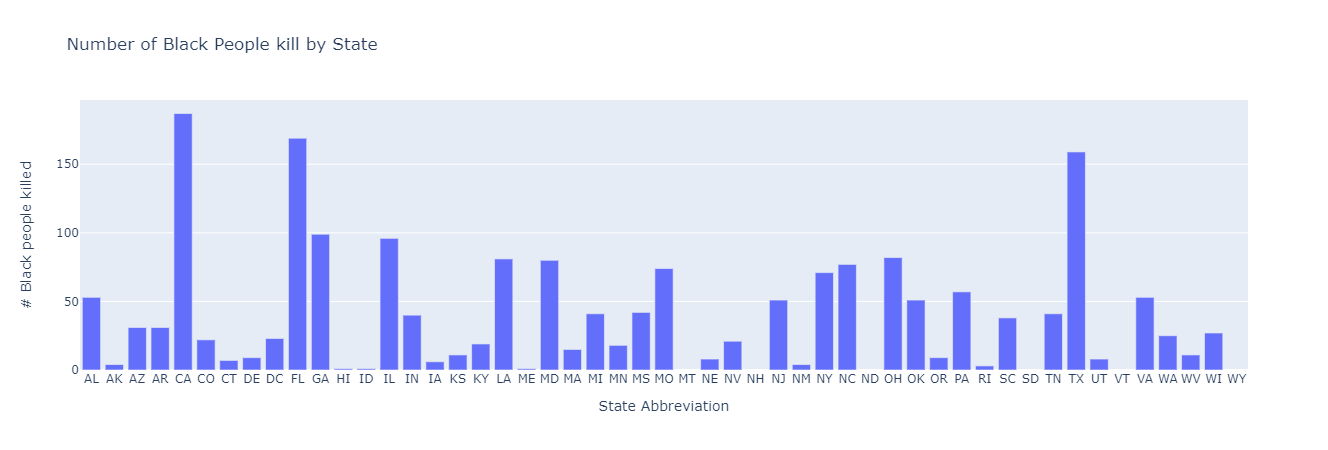

In [67]:
import plotly.express as px

fig = px.bar(df2, x="State Abbreviation", y="# Black people killed", title="Number of Black People kill by State")
fig.show()

In [72]:
pd.set_option('display.max_rows', 20)

In [73]:
df2

State State Abbreviation  \
0                                             Alabama                 AL   
1                                              Alaska                 AK   
2                                             Arizona                 AZ   
3                                            Arkansas                 AR   
4                                          California                 CA   
..                                                ...                ...   
48                                      West Virginia                 WV   
49                                          Wisconsin                 WI   
50                                            Wyoming                 WY   
51                                                NaN                NaN   
52  2018 5-Year ACS Demographic Data and Mapping P...                NaN   

    Total Population  Black Population  Hispanic Population  \
0          4864680.0         1285737.0             203146.0   
1           738516.0           22817.0              51186.0   
2          6946685.0          286614.0            2163312.0   
3          2990671.0          458536.0             219052.0   
4         39148760.0         2164519.0           15221577.0   
..               ...               ...                  ...   
48         1829054.0           65597.0              27522.0   
49         5778394.0          361909.0             385779.0   
50          581836.0            5149.0              56966.0   
51               NaN               NaN                  NaN   
52               NaN               NaN                  NaN   

    Native American Population  Asian Population  Pacific Islander Population  \
0                      23243.0           63936.0                       1521.0   
1                     103506.0           45617.0                       8544.0   
2                     271946.0          222477.0                      12523.0   
3                      17342.0           43441.0                       7877.0   
4                     138427.0         5525439.0                     138911.0   
..                         ...               ...                          ...   
48                      3546.0           14353.0                        309.0   
49                     46149.0          158198.0                       1676.0   
50                     12717.0            4660.0                        434.0   
51                         NaN               NaN                          NaN   
52                         NaN               NaN                          NaN   

    White Population  Other Population  % African-American  % Victims Black  \
0          3196730.0           90367.0            0.264300         0.384058   
1           450754.0           56092.0            0.030896         0.100000   
2          3825886.0          163927.0            0.041259         0.090909   
3          2173849.0           70574.0            0.153322         0.298077   
4         14695836.0         1264051.0            0.055290         0.158609   
..               ...               ...                 ...              ...   
48         1684756.0           32971.0            0.035864         0.148649   
49         4711038.0          113645.0            0.062631         0.243243   
50          489559.0           12351.0            0.008850         0.000000   
51               NaN               NaN                 NaN              NaN   
52               NaN               NaN                 NaN              NaN   

    Disparity  # Black people killed  # Hispanic people killed  \
0    0.119758                   53.0                       NaN   
1    0.069104                    4.0                       1.0   
2    0.049650                   31.0                     115.0   
3    0.144755                   31.0                       3.0   
4    0.103319                  187.0                     487.0   
..        ...                    ...                       .

In [77]:
df2_show = df2.sort_values(by=["# People Killed"], ascending=False)

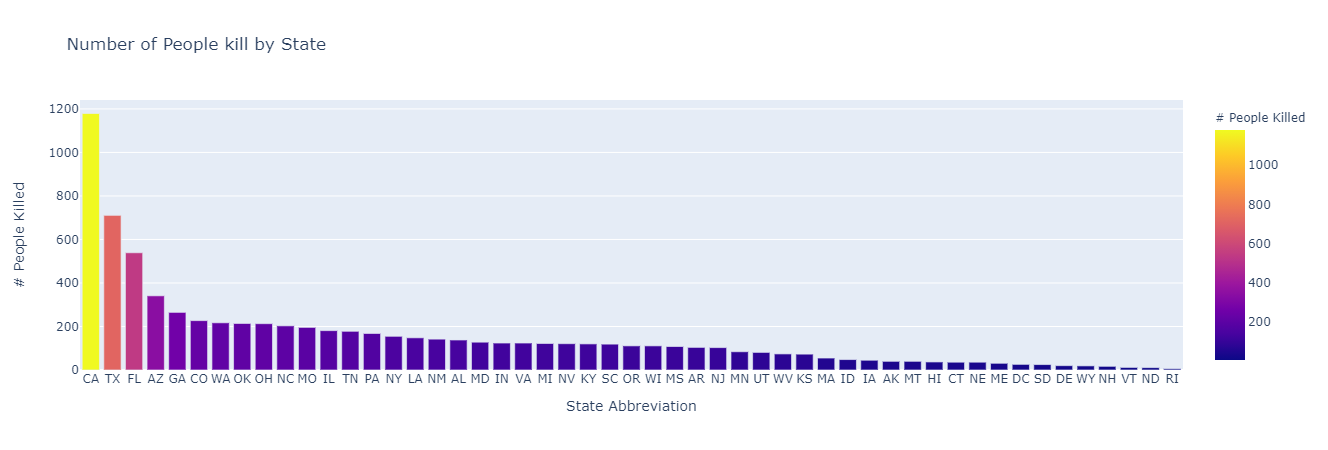

In [134]:
import plotly.express as px

fig = px.bar(df2_show, x="State Abbreviation", y="# People Killed", title="Number of People kill by State", color= "# People Killed")
fig.show()

In [170]:
states = "CA, TX, GA, SC, WA"

In [171]:
def state_selection(states:str):
    x = states.split(", ")
    for states in x:
        states.strip()
    return x

In [164]:
state_selection(states)

['CA', 'TX', 'GA', 'SC', 'WA']

In [165]:
df2_show2 = df2_show.loc[df2_show["State Abbreviation"].isin(state_selection(states))].copy()

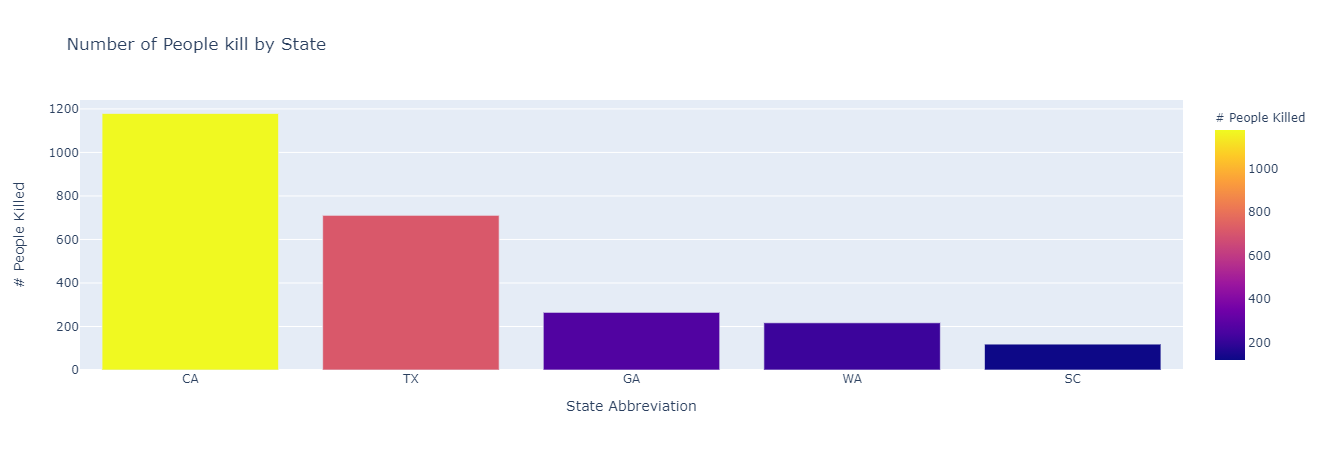

In [166]:
import plotly.express as px

fig = px.bar(df2_show2, x="State Abbreviation", y="# People Killed", title="Number of People kill by State", color= "# People Killed")
fig.show()

In [167]:
df['Date of Incident (month/day/year)'] == 2020-10-19

0       False
1       False
2       False
3       False
4       False
        ...  
8515    False
8516    False
8517    False
8518    False
8519    False
Name: Date of Incident (month/day/year), Length: 8520, dtype: bool

In [151]:
mask = ("11-24-2020" < df['Date of Incident (month/day/year)'] > '01-01-2020')

In [153]:
df_show2 = df.loc[mask].copy()

In [169]:
df_show2.groupby(["State"])

In [173]:
mask = (df['Zipcode'].isin(zcode))

In [172]:
zcode = [77414.0, 34614.0]
    

In [174]:
df_show3 = df.loc[mask].copy()

In [177]:
df_show3.nunique()

Victim's name                                                                                                                                                                 2
Victim's age                                                                                                                                                                  1
Victim's gender                                                                                                                                                               1
Victim's race                                                                                                                                                                 2
URL of image of victim                                                                                                                                                        0
                                                                                                                        

In [176]:
import plotly.express as px

fig = px.bar(df_show3, x="Zipcode", y="# People Killed", title="Number of People kill by State", color= "# People Killed")
fig.show()

Victim's name Victim's age Victim's gender Victim's race  \
131  Name withheld by police      Unknown            Male  Unknown race   
140           Erik Jon Perez      Unknown            Male         White   

    URL of image of victim Date of Incident (month/day/year)  \
131                    NaN                        2020-08-20   
140                    NaN                        2020-08-18   

    Street Address of Incident         City State  Zipcode     County  \
131   15301 Peach Orchard Road  Brooksville    FL  34614.0   Hernando   
140                        NaN     Bay City    TX  77414.0  Matagorda   

                          Agency responsible for death  \
131                   Hernando County Sheriff's Office   
140  Bay City Police Department, Matagorda County S...   

    ORI Agency Identifier (if available) Cause of death  \
131                            FL0270000        Gunshot   
140        TX1610100;TX1610000;TX0000000        Gunshot   

    A brief description of the circumstances surrounding the death  \
131  Around 9:15 p.m., deputies went to a home to s...               
140  Erik Jon Perez was reportedly wanted for felon...               

    Official disposition of death (justified or other) Criminal Charges?  \
131                              Pending investigation  No known charges   
140                              Pending investigation  No known charges   

    Link to news article or photo of official document  \
131  https://www.tampabay.com/news/hernando/2020/08...   
140  https://www.khou.com/article/news/crime/bay-ci...   

    Symptoms of mental illness? Unarmed/Did Not Have an Actual Weapon  \
131                          No                       Allegedly Armed   
140                          No                       Allegedly Armed   

    Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)  \
131                                                gun                                
140                                                gun                                

    Alleged Threat Level (Source: WaPo) Fleeing (Source: WaPo)  \
131                              attack                    NaN   
140                              attack                   Foot   

    Body Camera (Source: WaPo)  WaPo ID (If included in WaPo database)  \
131                         No                                  6102.0   
140                        NaN                                     NaN   

    Off-Duty Killing?  \
131               NaN   
140               NaN   

    Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )  \
131                                              Rural                                                                                                                           
140                                              Rural                                                                                                                           

     MPV ID  Fatal Encounters ID  
131  8408.0                  NaN  
140  8402.0                  NaN

In [192]:
df_show3

Victim's name Victim's age Victim's gender Victim's race  \
131  Name withheld by police      Unknown            Male  Unknown race   
140           Erik Jon Perez      Unknown            Male         White   

    URL of image of victim Date of Incident (month/day/year)  \
131                    NaN                        2020-08-20   
140                    NaN                        2020-08-18   

    Street Address of Incident         City State  Zipcode     County  \
131   15301 Peach Orchard Road  Brooksville    FL  34614.0   Hernando   
140                        NaN     Bay City    TX  77414.0  Matagorda   

                          Agency responsible for death  \
131                   Hernando County Sheriff's Office   
140  Bay City Police Department, Matagorda County S...   

    ORI Agency Identifier (if available) Cause of death  \
131                            FL0270000        Gunshot   
140        TX1610100;TX1610000;TX0000000        Gunshot   

    A brief description of the circumstances surrounding the death  \
131  Around 9:15 p.m., deputies went to a home to s...               
140  Erik Jon Perez was reportedly wanted for felon...               

    Official disposition of death (justified or other) Criminal Charges?  \
131                              Pending investigation  No known charges   
140                              Pending investigation  No known charges   

    Link to news article or photo of official document  \
131  https://www.tampabay.com/news/hernando/2020/08...   
140  https://www.khou.com/article/news/crime/bay-ci...   

    Symptoms of mental illness? Unarmed/Did Not Have an Actual Weapon  \
131                          No                       Allegedly Armed   
140                          No                       Allegedly Armed   

    Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)  \
131                                                gun                                
140                                                gun                                

    Alleged Threat Level (Source: WaPo) Fleeing (Source: WaPo)  \
131                              attack                    NaN   
140                              attack                   Foot   

    Body Camera (Source: WaPo)  WaPo ID (If included in WaPo database)  \
131                         No                                  6102.0   
140                        NaN                                     NaN   

    Off-Duty Killing?  \
131               NaN   
140               NaN   

    Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )  \
131                                              Rural                                                                                                                           
140                                              Rural                                                                                                                           

     MPV ID  Fatal Encounters ID  
131  8408.0                  NaN  
140  8402.0                  NaN

In [196]:
df4 = df_show3['Zipcode'].value_counts().rename_axis('unique_values').reset_index(name='counts')
print (df4)

   unique_values  counts
0        77414.0       1
1        34614.0       1


In [206]:
df4['unique_values'] = df4["unique_values"].astype(str)

In [208]:
df4.dtypes

unique_values    object
counts            int64
dtype: object

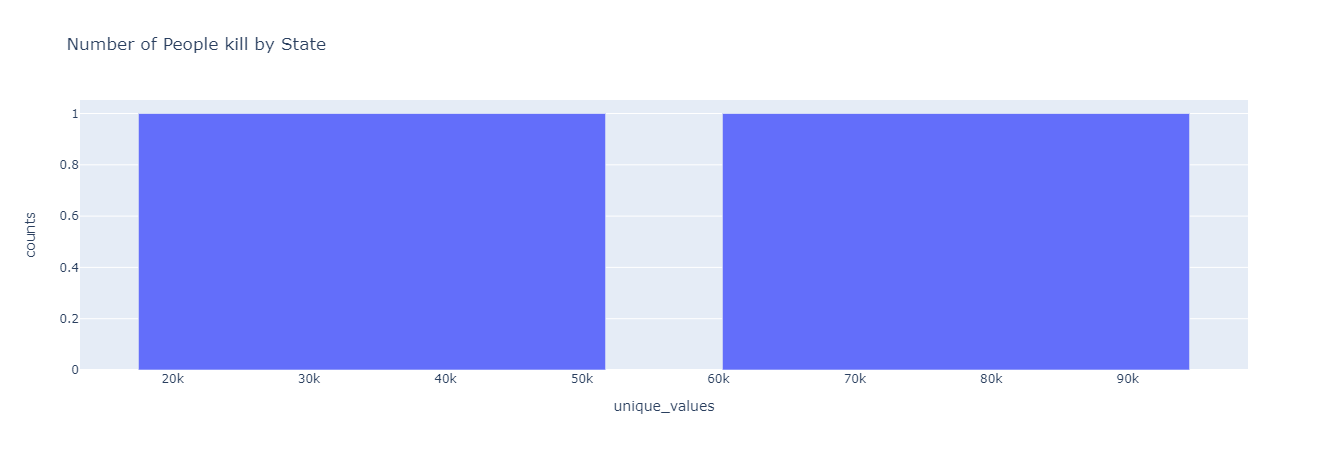

In [205]:
import plotly.express as px

fig = px.bar(df4, x="unique_values", y="counts", title="Number of People kill by State")
fig.show()

df

# Graph Functions
---

In [219]:
mask =  (df['Date of Incident (month/day/year)'] > start_date) & ( df['Date of Incident (month/day/year)'] <= end_date)


In [590]:

df = pd.read_csv('https://raw.githubusercontent.com/popkdodge/Dataset-Holder/main/final.csv', index_col=[0])
state_pop = pd.read_csv("https://raw.githubusercontent.com/popkdodge/Dataset-Holder/main/state_pop.csv", index_col=[0])

## Functions
def bar_incident(state_pop, df, start_date:str, end_date:str, groupby,asc=True):
    """
    This function serves to generate bar graphs that represent rate of deadly police shooting
    with filter that is determined by user inputs.
    
    The function can take in certian start and end_date and limit the data representation to those
    stated timeframes.
    
    This funcation can group the data set to show the graph represending user specific Zipcodes and States.
    """
    groupby = groupby
    state = state_pop.copy()
    df = df.copy()
    mask =  (df['Date of Incident (month/day/year)'] > start_date) & ( df['Date of Incident (month/day/year)'] <= end_date)
    df = df.loc[mask]
    if "National" in groupby:
        test_df = df['State'].value_counts().sort_values(ascending=asc).rename_axis('State').reset_index(name='counts')
        fin = pd.merge(state_pop, test_df, how="inner", on="State")
        fin['count/popPermillions'] = round(fin["counts"]/fin["Pop. Millions"])
        fin = fin.sort_values(by="count/popPermillions")
        fig = px.bar(fin, x="State", y="count/popPermillions", title="Number of People killed by police in the Selected States", color="State")
        return fig.show()
    if "States" in groupby:
        test_df = df.loc[df["State"].isin(groupby["States"])]
        test_df = test_df['State'].value_counts().sort_values(ascending=asc).rename_axis('State').reset_index(name='counts')
        fin = pd.merge(state_pop, test_df, how="inner", on="State")
        fin['count/popPermillions'] = round(fin["counts"]/fin["Pop. Millions"])
        fin = fin.sort_values(by="count/popPermillions")
        fig = px.bar(fin, x="State", y="count/popPermillions", title="Number of People killed by police in the Selected States", color="State")
        return fig.show()          
    if "Zipcode" in groupby:
        test_df = df.loc[df["Zipcode"].isin(groupby["Zipcode"])]
        test_df = test_df['Zipcode'].value_counts().sort_values(ascending=asc).rename_axis('Zipcode').reset_index(name='counts')
        test_df['Zipcode'] = test_df["Zipcode"].astype(int)
        test_df['Zipcode'] = test_df["Zipcode"].astype(str)
        fig = px.bar(test_df, x="Zipcode", y="counts", title="Number of People killed by police in the Zipcode", color="Zipcode")
        return fig.show()  
    if "City" in groupby:
        test_df = df.loc[df["CityState"].isin(groupby["City"])]
        test_df = test_df['CityState'].value_counts().sort_values(ascending=asc).rename_axis('CityState').reset_index(name='counts')
        fig = px.bar(test_df, x="CityState", y="counts", title="Number of People killed by police in the selected City", color="CityState")
        return fig.show()    
    
    return "No Selection or invalid inputs"

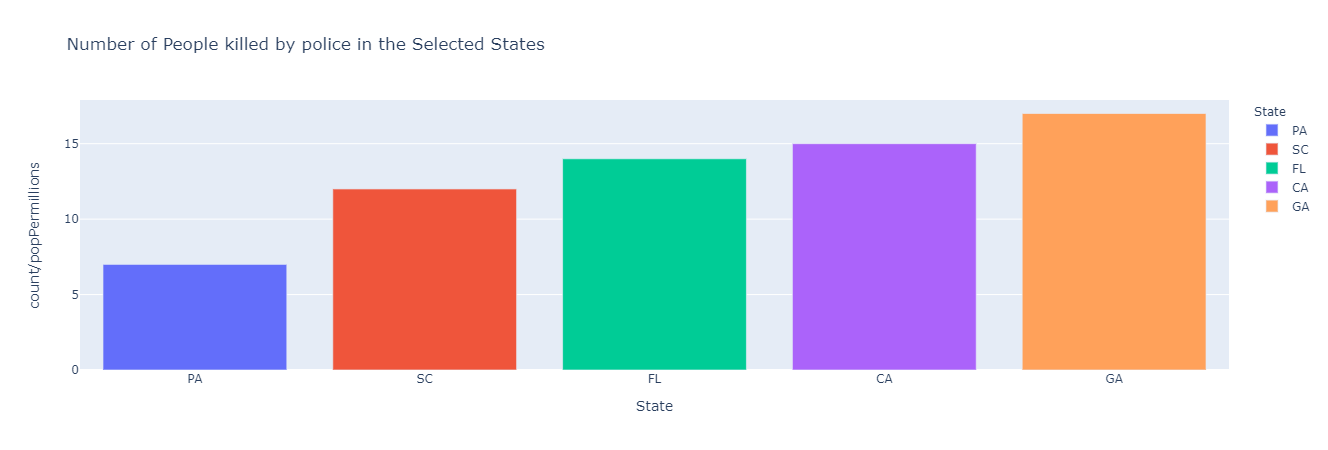

In [591]:
group_by = {"National":True}
bar_incident(state_pop, df, start_date, end_date, groupby_st,asc)


In [408]:
city = "Atlanta ,GA"
"Atlanta,GA"
cities = ["Atlanta","GA"]

In [570]:
# Test inputs 
start_date = "2017-01-01"
end_date = "2028-01-24"
groupby_nat = {"National":True}
groupby_st = {"States":["GA","FL","SC", "CA", "PA"]}
groupby_zip = {"Zipcode": [77414.0, 34614.0]}
groupby_cit = {"City": ["Atlanta,GA"]}
asc = True

In [565]:
# Projected sample input
User_inputs = {"graph_type":"bar",
               "graph_topic":"incident",
               "start_date": "01/24/2017",
               "end_date": "01/24/2028",
               "Groupby": {"State": ["GA","FL","SC", "CA", "PA"]},
               "asc": True}

In [581]:
state_pop

State  Pop. Millions
0     AL            5.0
1     AK            1.0
2     AZ            7.0
3     AR            3.0
4     CA           39.0
..   ...            ...
46    VA            8.0
47    WA            7.0
48    WV            2.0
49    WI            6.0
50    WY            1.0

[51 rows x 2 columns]

In [582]:
test_df = bar_incident(state_pop, df, start_date, end_date, groupby_nat, asc)

TypeError: bar_incident() missing 1 required positional argument: 'groupby'

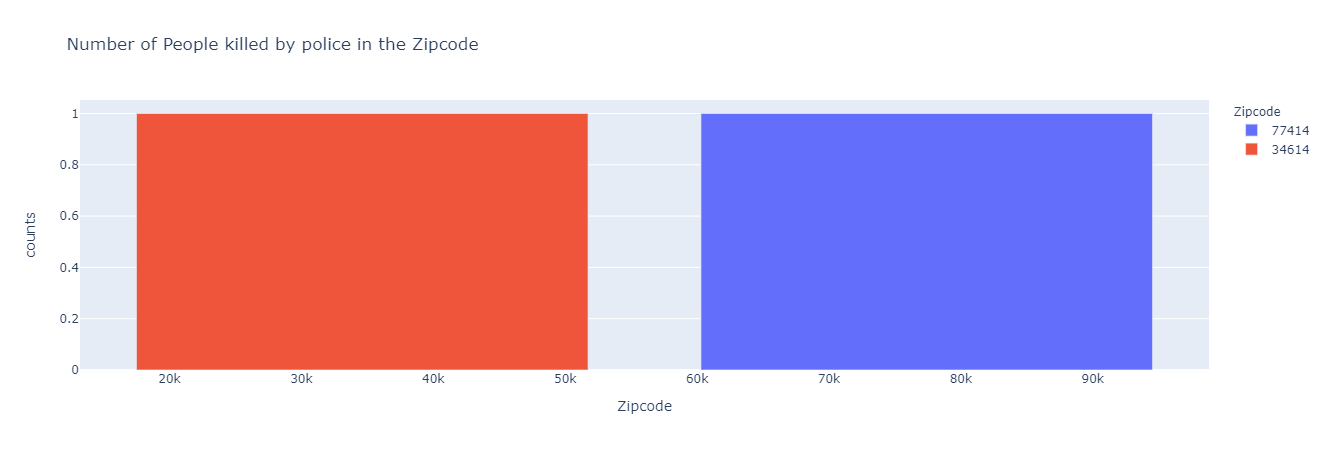

In [398]:
test_df = bar_incident(df, start_date, end_date, groupby_zip)

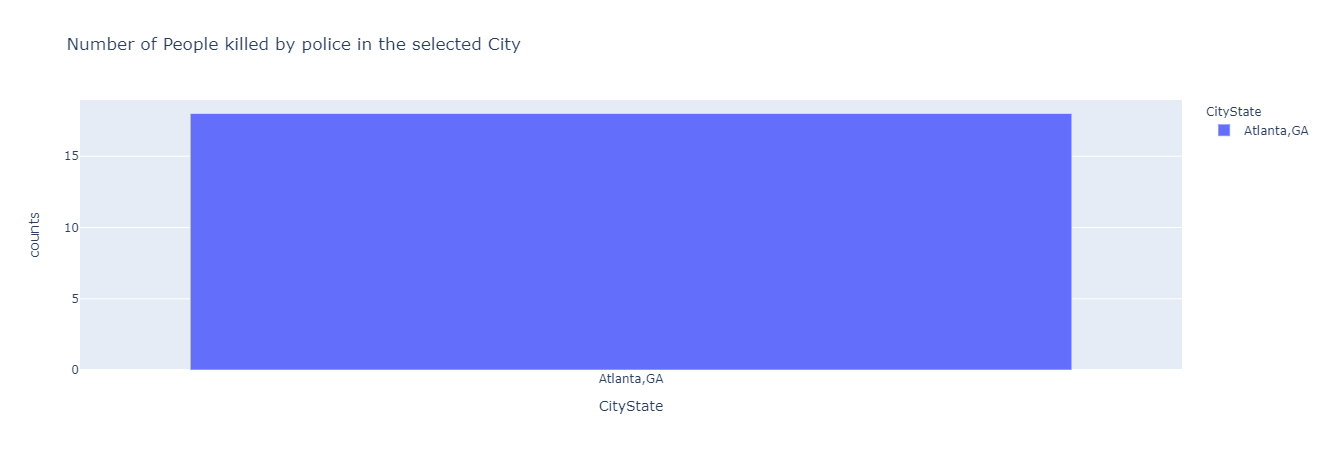

In [399]:
test_df = bar_incident(df, start_date, end_date, groupby_cit, asc)

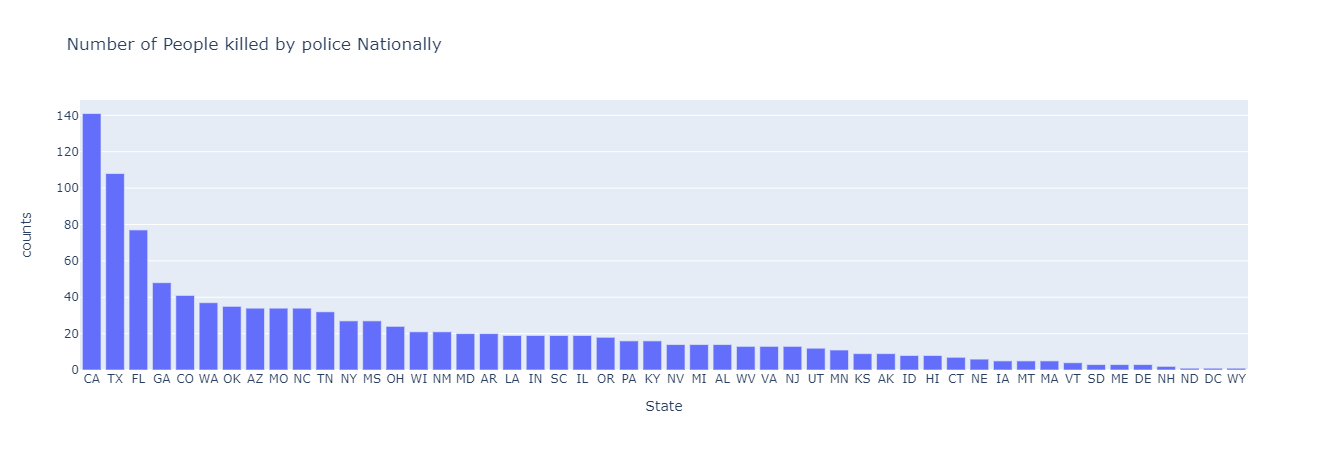

In [400]:
import plotly.express as px

fig = px.bar(df4, x="State", y="counts", title="Number of People killed by police Nationally")
fig.show()

In [401]:
df["CityState"] = df["City"]+","+df["State"]

In [537]:
df= pd.read_csv("final.csv")

In [526]:
start_date = "2020-01-01"
end_date = "2020-12-31"

df = df.copy()
mask =  (df['Date of Incident (month/day/year)'] > start_date) & ( df['Date of Incident (month/day/year)'] <= end_date)
df = df.loc[mask]


In [527]:
df['Victim\'s race'].value_counts(10)

White               0.362069
Unknown race        0.264368
Black               0.205747
Hispanic            0.140230
Asian               0.012644
Native American     0.008046
Pacific Islander    0.004598
Unknown             0.002299
Name: Victim's race, dtype: float64

In [528]:
df2020 = df['Victim\'s race'].value_counts(10).sort_values(ascending=asc).rename_axis('Demographic').reset_index(name='Percentage')

In [529]:
df2020

Demographic  Percentage
0           Unknown    0.002299
1  Pacific Islander    0.004598
2   Native American    0.008046
3             Asian    0.012644
4          Hispanic    0.140230
5             Black    0.205747
6      Unknown race    0.264368
7             White    0.362069

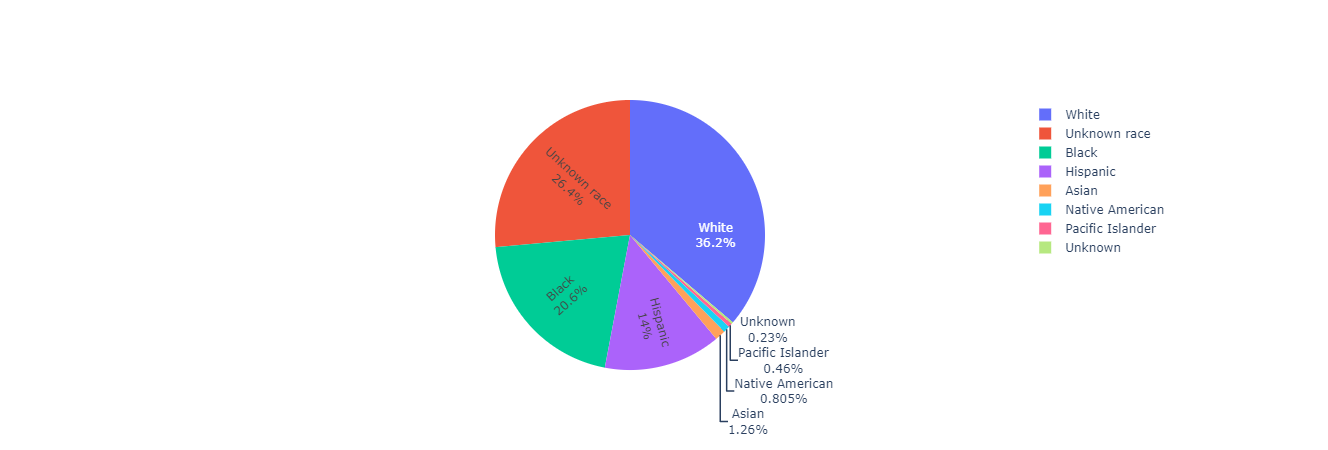

In [530]:
import plotly.graph_objects as go

labels = df2020["Demographic"]
values = df2020["Percentage"]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.show()

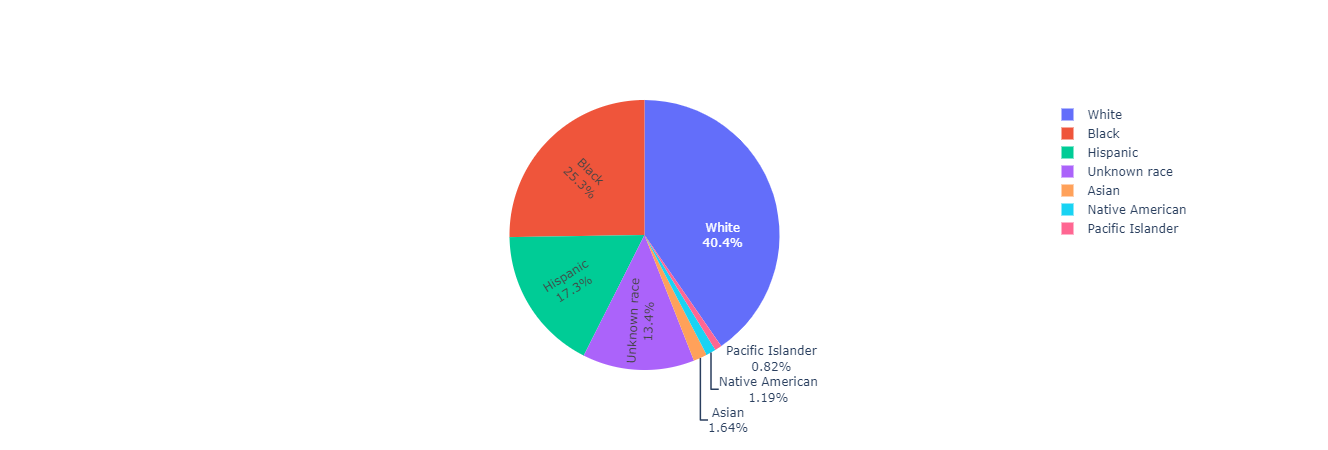

In [534]:
start_date = "2019-01-01"
end_date = "2019-12-31"

df2019 = df.copy()
mask =  (df2019['Date of Incident (month/day/year)'] > start_date) & ( df2019['Date of Incident (month/day/year)'] <= end_date)
df2019 = df2019.loc[mask]
df2019 = df2019['Victim\'s race'].value_counts(10).sort_values(ascending=asc).rename_axis('Demographic').reset_index(name='Percentage')
labels = df2019["Demographic"]
values = df2019["Percentage"]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.show()

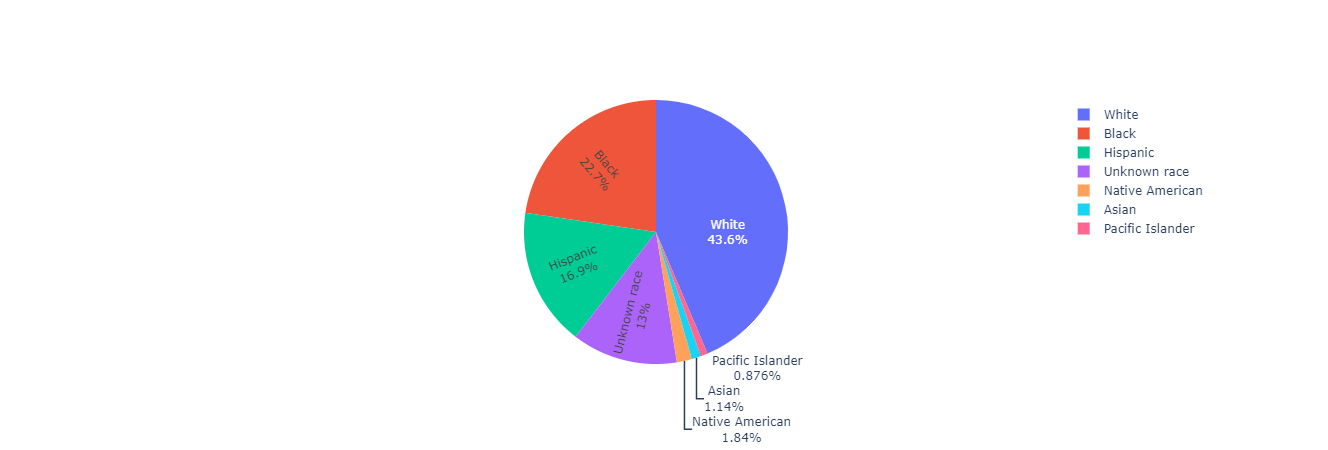

In [535]:
start_date = "2018-01-01"
end_date = "2018-12-31"

df2018 = df.copy()
mask =  (df2018['Date of Incident (month/day/year)'] > start_date) & ( df2018['Date of Incident (month/day/year)'] <= end_date)
df2018= df2018.loc[mask]
df2018= df2018['Victim\'s race'].value_counts(10).sort_values(ascending=asc).rename_axis('Demographic').reset_index(name='Percentage')
labels = df2018["Demographic"]
values = df2018["Percentage"]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.show()

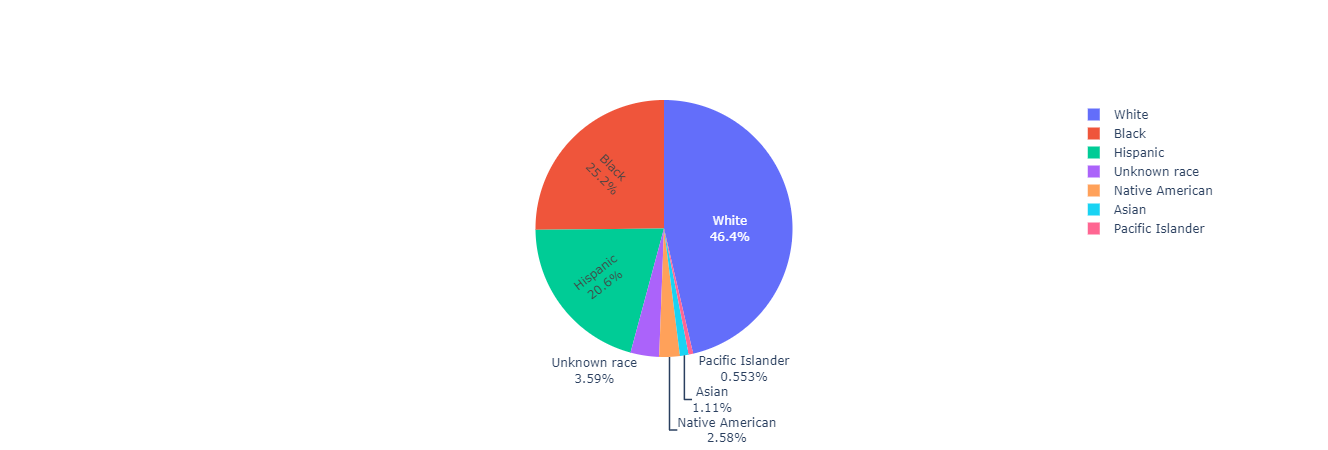

In [538]:
start_date = "2017-01-01"
end_date = "2017-12-31"

df2017 = df.copy()
mask =  (df2017['Date of Incident (month/day/year)'] > start_date) & ( df2017['Date of Incident (month/day/year)'] <= end_date)
df2017 = df2017.loc[mask]
df2017 = df2017['Victim\'s race'].value_counts(10).sort_values(ascending=asc).rename_axis('Demographic').reset_index(name='Percentage')
labels = df2017["Demographic"]
values = df2017["Percentage"]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.show()

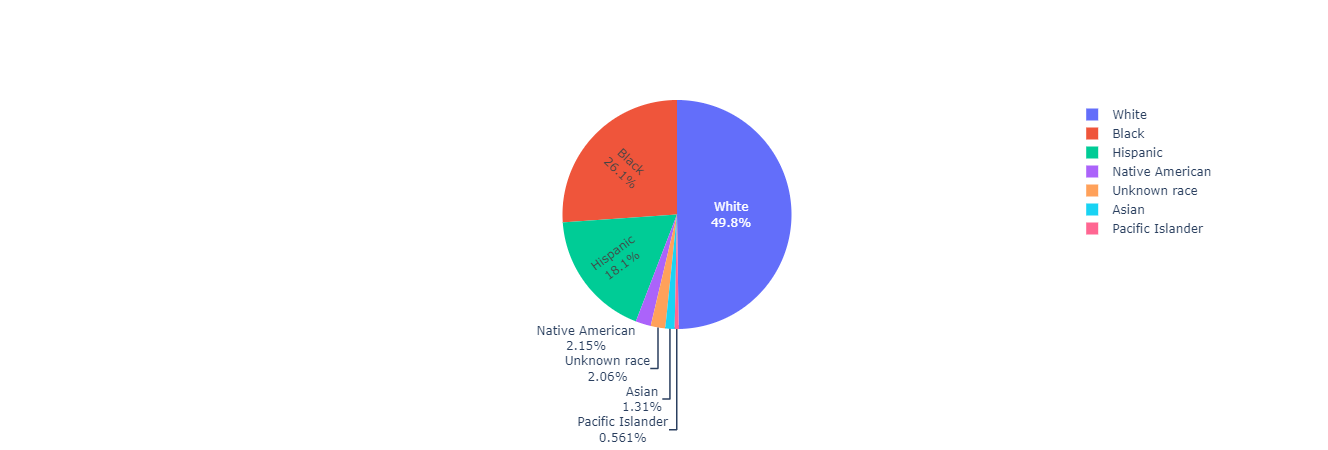

In [539]:
start_date = "2016-01-01"
end_date = "2016-12-31"


df2016 = df.copy()
mask =  (df2016['Date of Incident (month/day/year)'] > start_date) & ( df2016['Date of Incident (month/day/year)'] <= end_date)
df2016 = df2016.loc[mask]
df2016 = df2016['Victim\'s race'].value_counts(10).sort_values(ascending=asc).rename_axis('Demographic').reset_index(name='Percentage')
labels = df2016["Demographic"]
values = df2016["Percentage"]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.show()

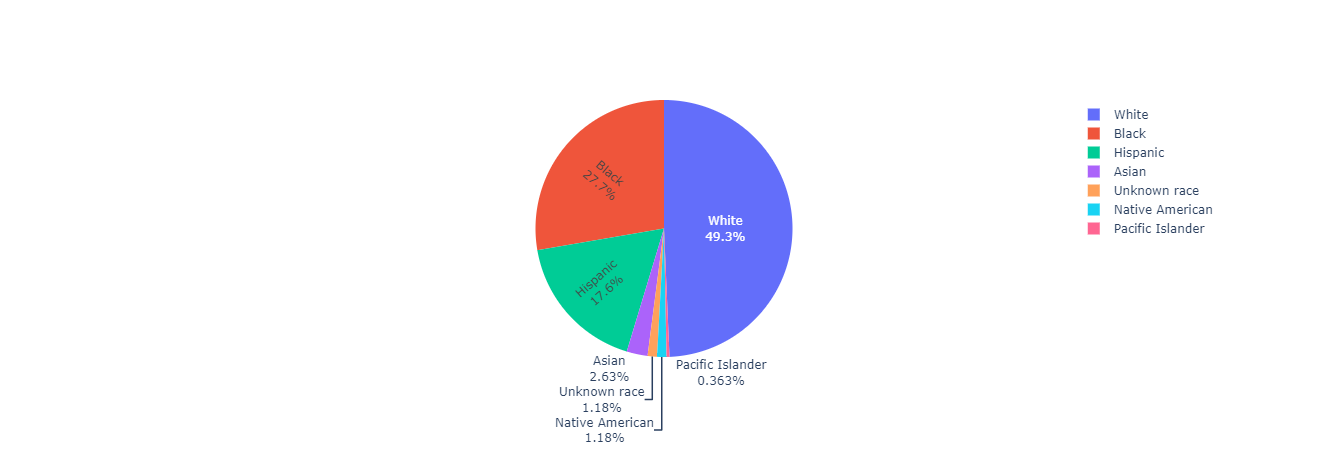

In [540]:
start_date = "2015-01-01"
end_date = "2015-12-31"

df2015 = df.copy()
mask =  (df2015['Date of Incident (month/day/year)'] > start_date) & ( df2015['Date of Incident (month/day/year)'] <= end_date)
df2015 = df2015.loc[mask]
df2015 = df2015['Victim\'s race'].value_counts(10).sort_values(ascending=asc).rename_axis('Demographic').reset_index(name='Percentage')
labels = df2015["Demographic"]
values = df2015["Percentage"]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.show()

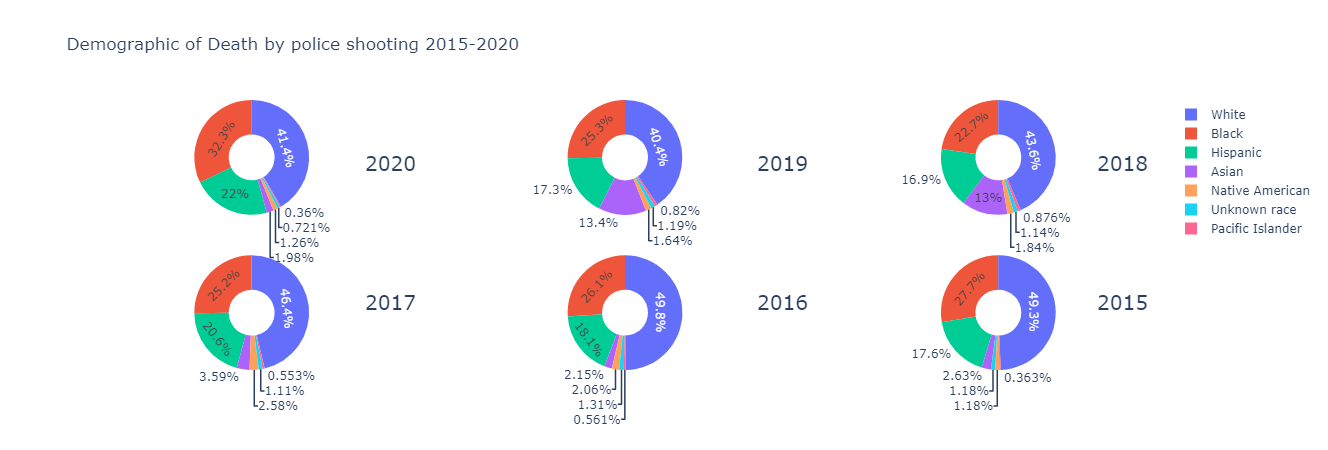

In [541]:
labels = df2015["Demographic"]
from plotly.subplots import make_subplots

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=2, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}],[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=df2020['Percentage'], name="2020"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=df2019['Percentage'], name="2019"),
              1, 2)
fig.add_trace(go.Pie(labels=labels, values=df2018['Percentage'], name="2018"),
              1, 3)
fig.add_trace(go.Pie(labels=labels, values=df2017['Percentage'], name="2017"),
              2, 1)
fig.add_trace(go.Pie(labels=labels, values=df2016['Percentage'], name="2016"),
              2, 2)
fig.add_trace(go.Pie(labels=labels, values=df2015['Percentage'], name="2015"),
              2, 3)
# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Demographic of Death by police shooting 2015-2020",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='2020', x=0.25, y=0.82, font_size=20, showarrow=False),
                 dict(text='2019', x=0.65, y=0.82, font_size=20, showarrow=False),
                 dict(text='2015', x=1.0, y=0.2, font_size=20, showarrow=False),
                 dict(text='2017', x=0.25, y=0.2, font_size=20, showarrow=False),
                 dict(text='2016', x=0.65, y=0.2, font_size=20, showarrow=False),
                 dict(text='2018', x=1.0, y=0.82, font_size=20, showarrow=False)])
fig.show()

In [481]:
df

Victim's name Victim's age Victim's gender Victim's race  \
0                Bryan Selmer          NaN            Male  Unknown race   
1              Paul Sulkowski           46            Male  Unknown race   
2     Name withheld by police           43            Male  Unknown race   
3     Tutuila Pine Koonwaiyou           37            Male  Unknown race   
4              Gregory Putnik           32            Male         White   
...                       ...          ...             ...           ...   
8515      Christopher Tavares           21            Male      Hispanic   
8516             Abel Gurrola           26            Male      Hispanic   
8517              Mark Chavez           49            Male      Hispanic   
8518        Andrew L. Closson           21            Male         White   
8519            Andrew Layton           26            Male         White   

                                 URL of image of victim  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
8515  http://www.krdo.com/image/view/-/17980228/medR...   
8516  http://www.bakersfieldnow.com/news/local/A-26-...   
8517  http://www.tricitytribuneusa.com/wp-content/up...   
8518  http://www.superiortelegram.com/sites/default/...   
8519  http://bloximages.chicago2.vip.townnews.com/ma...   

     Date of Incident (month/day/year)             Street Address of Incident  \
0                           2020-10-19                                    NaN   
1                           2020-10-19                  5306 Towne Woods Road   
2                           2020-10-19                                    NaN   
3                           2020-10-18                                    NaN   
4                           2020-10-18                                    NaN   
...                                ...                                    ...   
8515                        2013-01-01  Highway 50 and North Elizabeth Street   
8516                        2013-01-01                        720 Terrace Way   
8517                        2013-01-01                    912 Loma Linda Ave.   
8518                        2013-01-01                        U.S. Highway 53   
8519                        2013-01-01                 410 S Riverfront Drive   

                 City State  Zipcode      County  \
0          Emmitsburg    MD      NaN   Frederick   
1               Coram    NY      NaN     Suffolk   
2     South Milwaukee    WI      NaN         NaN   
3              Tooele    UT      NaN         NaN   
4              Fresno    CA      NaN         NaN   
...               ...   ...      ...         ...   
8515           Pueblo    CO  81008.0      Pueblo   
8516      Bakersfield    CA  93304.0        Kern   
8517       Farmington    NM  87401.0    San Juan   
8518           Gordon    WI  54838.0     Douglas   
8519          Mankato    MN  56001.0  Blue Earth   

               Agency responsible for death  \
0     Frederick County Sheriff's Department   
1          Suffolk County Police Department   
2         South Milwaukee Police Department   
3                  Tooele Police Department   
4                  Fresno Police Department   
...                                     ...   
8515               Pueblo Police Department   
8516          Bakersfield Police Department   
8517           Farmington Police Department   
8518        Douglas County Sheriff's Office   
8519    Mankato Department of Public Safety   

     ORI Agency Identifier (if available) Cause of death  \
0                               MD0110000        Gunshot   
1                               NY0510100        Gunshot   
2                               WI0411400        Gu

In [486]:
df_t = df.copy()
mask =  (df['Date of Incident (month/day/year)'] > start_date) & ( df['Date of Incident (month/day/year)'] <= end_date)
df_t = df_t.loc[mask]
df_t


Victim's name Victim's age Victim's gender  \
5279            Keith Childress           23            Male   
5280                 Fred Perez           55            Male   
5281         John Randell Veach           39            Male   
5282                   Tien Hua           33            Male   
5283  Siolosega Velega-Nuufolau           50          Female   
...                         ...          ...             ...   
6375              Kenneth Brown           18            Male   
6376            Matthew Hoffman           32            Male   
6377         John Paul Quintero           23            Male   
6378                Tim Elliott           53            Male   
6379           Lewis Lee Lembke           47            Male   

         Victim's race                             URL of image of victim  \
5279             Black   http://www.killedbypolice.net/victims/151199.jpg   
5280          Hispanic                                                NaN   
5281      Unknown race                                                NaN   
5282             Asian                                                NaN   
5283  Pacific Islander   http://www.killedbypolice.net/victims/151192.jpg   
...                ...                                                ...   
6375             White   http://www.killedbypolice.net/victims/150095.jpg   
6376             White                                                NaN   
6377          Hispanic  https://lintvksnw.files.wordpress.com/2015/01/...   
6378             Asian  http://policekillings.info/wp-content/uploads/...   
6379             White                                                NaN   

     Date of Incident (month/day/year)       Street Address of Incident  \
5279                        2015-12-31       8300 Golden Cypress Avenue   
5280                        2015-12-30    E Belmont Ave and N Weber Ave   
5281                        2015-12-30               1115 N Higley Blvd   
5282                        2015-12-29                  3500 Strang Ave   
5283                        2015-12-29                 29000 Del Sol Ct   
...                                ...                              ...   
6375                        2015-01-04            300 East Harrison Ave   
6376                        2015-01-04  Valencia Street and 17th Street   
6377                        2015-01-03                 500 N Oliver Ave   
6378                        2015-01-02             600 E Island Lake Dr   
6379                        2015-01-02           4519 S.W. Masters Loop   

                     City State  Zipcode         County  \
5279            Las Vegas    NV  89117.0          Clark   
5280               Fresno    CA  93701.0         Fresno   
5281              Rawlins    WY  82301.0         Carbon   
5282             Rosemead    CA  91770.0    Los Angeles   
5283  Santa Nella Village    CA  95322.0         Merced   
...                   ...   ...      ...            ...   
6375              Guthrie    OK  73044.0          Logan   
6376        San Francisco    CA  94110.0  San Francisco   
6377              Wichita    KS  67208.0       Sedgwick   
6378              Shelton    WA  98584.0          Mason   
6379                Aloha    OR  97007.0     Washington   

                  Agency responsible for death  \
5279  Las Vegas Metropolitan Police Department   
5280                  Fresno Police Department   
5281                 Rawlins Police Department   
5282             Los Angeles Police Department   
5283        Merced County Sheriff's Department   
...                                        ...   
6375                   Oklahoma Highway Patrol   
6376           San Francisco Police Department   
6377                 Wichita Police Department   
6378             Mason County Sheriff's Office   
6379        Washington County Sheriff's Office   

     ORI Agency Identifier (if available)  Cause of death  \
5279                            NV0020100         Gu

In [498]:
df_t['Unarmed/Did Not Have an Actual Weapon'].value_counts()

Allegedly Armed                          772
Unarmed/Did Not Have an Actual Weapon    218
Vehicle                                   61
Unclear                                   50
Name: Unarmed/Did Not Have an Actual Weapon, dtype: int64

In [499]:
df_t['Fleeing (Source: WaPo)'].value_counts()

Not fleeing    715
Car            143
Foot           108
Other           19
Name: Fleeing (Source: WaPo), dtype: int64

In [500]:
df_t['Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )'].value_counts()

Suburban        547
Urban           290
Rural           251
Undetermined     13
Name: Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ), dtype: int64

In [501]:

df_t['Off-Duty Killing?'].value_counts()

Off-Duty    23
Name: Off-Duty Killing?, dtype: int64

In [504]:
df_t['Alleged Threat Level (Source: WaPo)'].value_counts()

attack          731
other           219
undetermined     44
Name: Alleged Threat Level (Source: WaPo), dtype: int64

In [507]:
df_t['Body Camera (Source: WaPo)'].value_counts()

No                 916
Yes                 74
Bystander Video      2
Name: Body Camera (Source: WaPo), dtype: int64

In [509]:
# Feature Selection

In [643]:
def pie_arm_unarmed(df, start_date:str, end_date:str, groupby):
    # Selection of timeframes
    df = df.copy()
    mask =  (df['Date of Incident (month/day/year)'] > start_date) & ( df['Date of Incident (month/day/year)'] <= end_date)
    df = df.loc[mask]
    
    if groupby == "National":
        df = df['Unarmed/Did Not Have an Actual Weapon'].value_counts(10).sort_values(ascending=asc).rename_axis('Armed/Unarmed').reset_index(name='Percentage')
        labels = df["Armed/Unarmed"]
        values = df["Percentage"]
        fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                                     insidetextorientation='radial'
                                    )])
        fig.update_layout(
            title="Percent of Armed vs. Unarmed victims",
            xaxis_title="X Axis Title",
            yaxis_title="X Axis Title",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="RebeccaPurple"))
        return fig.show()
    if "States" in groupby:
        df = df.loc[df['State'].isin(groupby["States"])]
        df = df['Unarmed/Did Not Have an Actual Weapon'].value_counts(10).sort_values(ascending=asc).rename_axis('Armed/Unarmed').reset_index(name='Percentage')
        labels = df["Armed/Unarmed"]
        values = df["Percentage"]
        fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                                     insidetextorientation='radial',
                                    )])
        fig.update_layout(
            title="Percent of Armed vs. Unarmed victims",
            xaxis_title="X Axis Title",
            yaxis_title="X Axis Title",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="RebeccaPurple"))
        return fig.show()         
    if "City" in groupby:
        df = df.loc[df['City_State'].isin(groupby["City"])]
        df = df['Unarmed/Did Not Have an Actual Weapon'].value_counts(10).sort_values(ascending=asc).rename_axis('Armed/Unarmed').reset_index(name='Percentage')
        labels = df["Armed/Unarmed"]
        values = df["Percentage"]
        fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                                     insidetextorientation='radial'
                                    )]) 
        fig.update_layout(
            title="Percent of Armed vs. Unarmed victims",
            xaxis_title="X Axis Title",
            yaxis_title="X Axis Title",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="RebeccaPurple"))
        return fig.show()
    return "No Selection or invalid inputs"

In [631]:
# Test inputs 
start_date = "01/24/2011"
end_date = "01/24/2028"
groupby_nat = "National"
groupby_st = {"States":["GA","FL","SC", "CA", "PA"]}
groupby_zip = {"Zipcode": [77414.0, 34614.0]}
groupby_cit = {"City": ["Emmitsburg, MD", 'Coram, NY', 'Tooele, UT']}
asc = True

In [632]:
mask =  (df['Date of Incident (month/day/year)'] > start_date) & ( df['Date of Incident (month/day/year)'] <= end_date)
df = df.loc[mask]
    

In [633]:
df = df.loc[df['City_State'].isin(groupby_cit["City"])].copy()


In [615]:
dfc = df['Unarmed/Did Not Have an Actual Weapon'].value_counts(10).sort_values(ascending=asc).rename_axis('Armed/Unarmed').reset_index(name='Percentage')

In [616]:
dfc

Armed/Unarmed  Percentage
0                                Vehicle    0.065962
1                                Unclear    0.081925
2  Unarmed/Did Not Have an Actual Weapon    0.136620
3                        Allegedly Armed    0.715493

In [641]:
df = pd.read_excel("./Datasets/PoliceShooting.xlsx")
df['City_State'] = df['City']+', '+df['State']

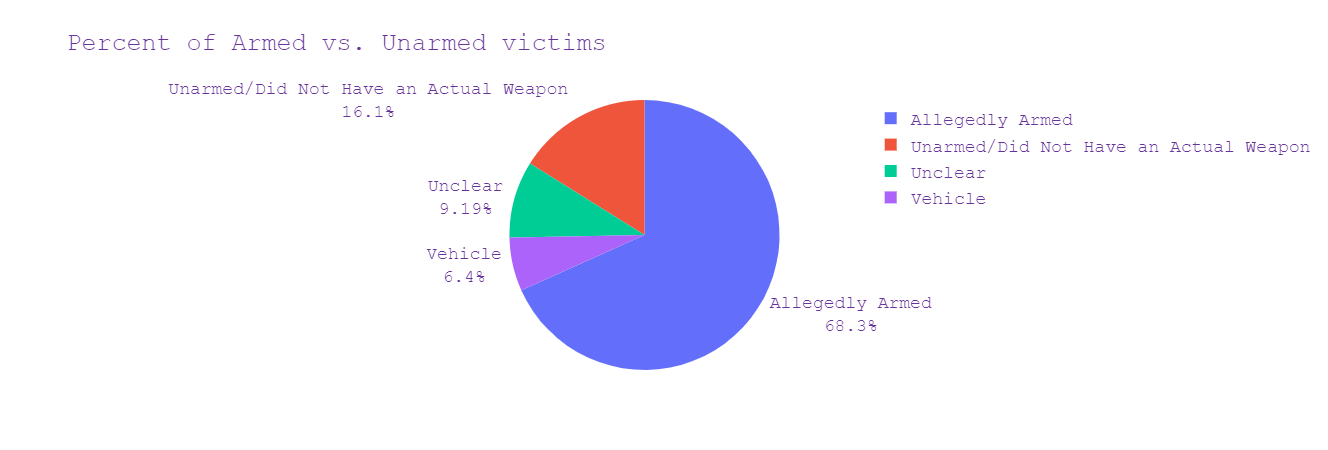

In [644]:
pie_arm_unarmed(df, start_date, end_date, groupby_st)

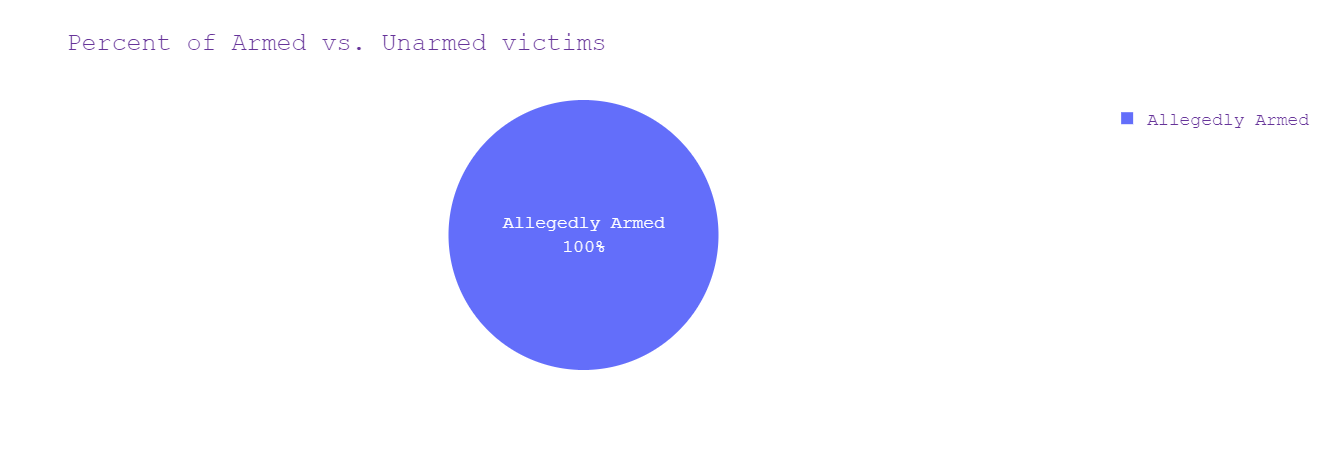

In [645]:
pie_arm_unarmed(df, start_date, end_date, groupby_cit)

In [568]:
df['City_State'] = df['City']+', '+df['State']

In [583]:
groupby_cit["City"]

['Emmitsburg, MD', 'Coram, NY', 'Tooele, UT']

In [554]:
df = df.loc[df['City_State'].isin(groupby_cit["City"])].copy()

In [646]:
df

Victim's name Victim's age Victim's gender Victim's race  \
0                Bryan Selmer          NaN            Male  Unknown race   
1              Paul Sulkowski           46            Male  Unknown race   
2     Name withheld by police           43            Male  Unknown race   
3     Tutuila Pine Koonwaiyou           37            Male  Unknown race   
4              Gregory Putnik           32            Male         White   
...                       ...          ...             ...           ...   
8515      Christopher Tavares           21            Male      Hispanic   
8516             Abel Gurrola           26            Male      Hispanic   
8517              Mark Chavez           49            Male      Hispanic   
8518        Andrew L. Closson           21            Male         White   
8519            Andrew Layton           26            Male         White   

                                 URL of image of victim  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
8515  http://www.krdo.com/image/view/-/17980228/medR...   
8516  http://www.bakersfieldnow.com/news/local/A-26-...   
8517  http://www.tricitytribuneusa.com/wp-content/up...   
8518  http://www.superiortelegram.com/sites/default/...   
8519  http://bloximages.chicago2.vip.townnews.com/ma...   

     Date of Incident (month/day/year)             Street Address of Incident  \
0                           2020-10-19                                    NaN   
1                           2020-10-19                  5306 Towne Woods Road   
2                           2020-10-19                                    NaN   
3                           2020-10-18                                    NaN   
4                           2020-10-18                                    NaN   
...                                ...                                    ...   
8515                        2013-01-01  Highway 50 and North Elizabeth Street   
8516                        2013-01-01                        720 Terrace Way   
8517                        2013-01-01                    912 Loma Linda Ave.   
8518                        2013-01-01                        U.S. Highway 53   
8519                        2013-01-01                 410 S Riverfront Drive   

                 City State  Zipcode      County  \
0          Emmitsburg    MD      NaN   Frederick   
1               Coram    NY      NaN     Suffolk   
2     South Milwaukee    WI      NaN         NaN   
3              Tooele    UT      NaN         NaN   
4              Fresno    CA      NaN         NaN   
...               ...   ...      ...         ...   
8515           Pueblo    CO  81008.0      Pueblo   
8516      Bakersfield    CA  93304.0        Kern   
8517       Farmington    NM  87401.0    San Juan   
8518           Gordon    WI  54838.0     Douglas   
8519          Mankato    MN  56001.0  Blue Earth   

               Agency responsible for death  \
0     Frederick County Sheriff's Department   
1          Suffolk County Police Department   
2         South Milwaukee Police Department   
3                  Tooele Police Department   
4                  Fresno Police Department   
...                                     ...   
8515               Pueblo Police Department   
8516          Bakersfield Police Department   
8517           Farmington Police Department   
8518        Douglas County Sheriff's Office   
8519    Mankato Department of Public Safety   

     ORI Agency Identifier (if available) Cause of death  \
0                               MD0110000        Gunshot   
1                               NY0510100        Gunshot   
2                               WI0411400        Gu

In [649]:
df

Victim's name Victim's age Victim's gender Victim's race  \
0                Bryan Selmer          NaN            Male  Unknown race   
1              Paul Sulkowski           46            Male  Unknown race   
2     Name withheld by police           43            Male  Unknown race   
3     Tutuila Pine Koonwaiyou           37            Male  Unknown race   
4              Gregory Putnik           32            Male         White   
...                       ...          ...             ...           ...   
8515      Christopher Tavares           21            Male      Hispanic   
8516             Abel Gurrola           26            Male      Hispanic   
8517              Mark Chavez           49            Male      Hispanic   
8518        Andrew L. Closson           21            Male         White   
8519            Andrew Layton           26            Male         White   

                                 URL of image of victim  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
8515  http://www.krdo.com/image/view/-/17980228/medR...   
8516  http://www.bakersfieldnow.com/news/local/A-26-...   
8517  http://www.tricitytribuneusa.com/wp-content/up...   
8518  http://www.superiortelegram.com/sites/default/...   
8519  http://bloximages.chicago2.vip.townnews.com/ma...   

     Date of Incident (month/day/year)             Street Address of Incident  \
0                           2020-10-19                                          
1                           2020-10-19                  5306 Towne Woods Road   
2                           2020-10-19                                          
3                           2020-10-18                                          
4                           2020-10-18                                          
...                                ...                                    ...   
8515                        2013-01-01  Highway 50 and North Elizabeth Street   
8516                        2013-01-01                        720 Terrace Way   
8517                        2013-01-01                    912 Loma Linda Ave.   
8518                        2013-01-01                        U.S. Highway 53   
8519                        2013-01-01                 410 S Riverfront Drive   

                 City State  Zipcode      County  \
0          Emmitsburg    MD      NaN   Frederick   
1               Coram    NY      NaN     Suffolk   
2     South Milwaukee    WI      NaN         NaN   
3              Tooele    UT      NaN         NaN   
4              Fresno    CA      NaN         NaN   
...               ...   ...      ...         ...   
8515           Pueblo    CO  81008.0      Pueblo   
8516      Bakersfield    CA  93304.0        Kern   
8517       Farmington    NM  87401.0    San Juan   
8518           Gordon    WI  54838.0     Douglas   
8519          Mankato    MN  56001.0  Blue Earth   

               Agency responsible for death  \
0     Frederick County Sheriff's Department   
1          Suffolk County Police Department   
2         South Milwaukee Police Department   
3                  Tooele Police Department   
4                  Fresno Police Department   
...                                     ...   
8515               Pueblo Police Department   
8516          Bakersfield Police Department   
8517           Farmington Police Department   
8518        Douglas County Sheriff's Office   
8519    Mankato Department of Public Safety   

     ORI Agency Identifier (if available) Cause of death  \
0                               MD0110000        Gunshot   
1                               NY0510100        Gunshot   
2                               WI0411400        Gu

In [653]:
df['Street Address of Incident'].fillna('', inplace=True)
df['Zipcode'].fillna("", inplace=True)

In [656]:
df["Adress"] = df['Street Address of Incident'] + " " + df['City'] + ", " + df["State"]

In [657]:
df

Victim's name Victim's age Victim's gender Victim's race  \
0                Bryan Selmer          NaN            Male  Unknown race   
1              Paul Sulkowski           46            Male  Unknown race   
2     Name withheld by police           43            Male  Unknown race   
3     Tutuila Pine Koonwaiyou           37            Male  Unknown race   
4              Gregory Putnik           32            Male         White   
...                       ...          ...             ...           ...   
8515      Christopher Tavares           21            Male      Hispanic   
8516             Abel Gurrola           26            Male      Hispanic   
8517              Mark Chavez           49            Male      Hispanic   
8518        Andrew L. Closson           21            Male         White   
8519            Andrew Layton           26            Male         White   

                                 URL of image of victim  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
8515  http://www.krdo.com/image/view/-/17980228/medR...   
8516  http://www.bakersfieldnow.com/news/local/A-26-...   
8517  http://www.tricitytribuneusa.com/wp-content/up...   
8518  http://www.superiortelegram.com/sites/default/...   
8519  http://bloximages.chicago2.vip.townnews.com/ma...   

     Date of Incident (month/day/year)             Street Address of Incident  \
0                           2020-10-19                                          
1                           2020-10-19                  5306 Towne Woods Road   
2                           2020-10-19                                          
3                           2020-10-18                                          
4                           2020-10-18                                          
...                                ...                                    ...   
8515                        2013-01-01  Highway 50 and North Elizabeth Street   
8516                        2013-01-01                        720 Terrace Way   
8517                        2013-01-01                    912 Loma Linda Ave.   
8518                        2013-01-01                        U.S. Highway 53   
8519                        2013-01-01                 410 S Riverfront Drive   

                 City State Zipcode      County  \
0          Emmitsburg    MD           Frederick   
1               Coram    NY             Suffolk   
2     South Milwaukee    WI                 NaN   
3              Tooele    UT                 NaN   
4              Fresno    CA                 NaN   
...               ...   ...     ...         ...   
8515           Pueblo    CO   81008      Pueblo   
8516      Bakersfield    CA   93304        Kern   
8517       Farmington    NM   87401    San Juan   
8518           Gordon    WI   54838     Douglas   
8519          Mankato    MN   56001  Blue Earth   

               Agency responsible for death  \
0     Frederick County Sheriff's Department   
1          Suffolk County Police Department   
2         South Milwaukee Police Department   
3                  Tooele Police Department   
4                  Fresno Police Department   
...                                     ...   
8515               Pueblo Police Department   
8516          Bakersfield Police Department   
8517           Farmington Police Department   
8518        Douglas County Sheriff's Office   
8519    Mankato Department of Public Safety   

     ORI Agency Identifier (if available) Cause of death  \
0                               MD0110000        Gunshot   
1                               NY0510100        Gunshot   
2                               WI0411400        Gunshot   
3  

In [658]:
!pip install geopandas

In [659]:
!pip install geopy

In [673]:
from geopy.geocoders import Nominatim
import geopy.geocoders
geopy.geocoders.options.default_user_agent = 'PoliceViolence'
geolocator = Nominatim()

In [674]:
locator = Nominatim(user_agent="PoliceViolence")
location = locator.geocode("Champ de Mars, Paris, France")
location

Location(Champ de Mars, Rue du Capitaine Scott, Quartier de Grenelle, Paris, Île-de-France, France métropolitaine, 75015, France, (48.85614465, 2.297820393322227, 0.0))

In [ ]:
from geopy.extra.rate_limiter import RateLimiter

geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1/20)
df['location'] = df['Adress'].apply(geocode)

df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)

In [672]:
df.to_csv('finish.csv', index=True)

In [683]:
df = pd.read_csv('finish.csv')
df

Unnamed: 0            Victim's name Victim's age Victim's gender  \
0              0             Bryan Selmer          NaN            Male   
1              1           Paul Sulkowski           46            Male   
2              2  Name withheld by police           43            Male   
3              3  Tutuila Pine Koonwaiyou           37            Male   
4              4           Gregory Putnik           32            Male   
...          ...                      ...          ...             ...   
8515        8515      Christopher Tavares           21            Male   
8516        8516             Abel Gurrola           26            Male   
8517        8517              Mark Chavez           49            Male   
8518        8518        Andrew L. Closson           21            Male   
8519        8519            Andrew Layton           26            Male   

     Victim's race                             URL of image of victim  \
0     Unknown race                                                NaN   
1     Unknown race                                                NaN   
2     Unknown race                                                NaN   
3     Unknown race                                                NaN   
4            White                                                NaN   
...            ...                                                ...   
8515      Hispanic  http://www.krdo.com/image/view/-/17980228/medR...   
8516      Hispanic  http://www.bakersfieldnow.com/news/local/A-26-...   
8517      Hispanic  http://www.tricitytribuneusa.com/wp-content/up...   
8518         White  http://www.superiortelegram.com/sites/default/...   
8519         White  http://bloximages.chicago2.vip.townnews.com/ma...   

     Date of Incident (month/day/year)             Street Address of Incident  \
0                           2020-10-19                                    NaN   
1                           2020-10-19                  5306 Towne Woods Road   
2                           2020-10-19                                    NaN   
3                           2020-10-18                                    NaN   
4                           2020-10-18                                    NaN   
...                                ...                                    ...   
8515                        2013-01-01  Highway 50 and North Elizabeth Street   
8516                        2013-01-01                        720 Terrace Way   
8517                        2013-01-01                    912 Loma Linda Ave.   
8518                        2013-01-01                        U.S. Highway 53   
8519                        2013-01-01                 410 S Riverfront Drive   

                 City State  Zipcode      County  \
0          Emmitsburg    MD      NaN   Frederick   
1               Coram    NY      NaN     Suffolk   
2     South Milwaukee    WI      NaN         NaN   
3              Tooele    UT      NaN         NaN   
4              Fresno    CA      NaN         NaN   
...               ...   ...      ...         ...   
8515           Pueblo    CO  81008.0      Pueblo   
8516      Bakersfield    CA  93304.0        Kern   
8517       Farmington    NM  87401.0    San Juan   
8518           Gordon    WI  54838.0     Douglas   
8519          Mankato    MN  56001.0  Blue Earth   

               Agency responsible for death  \
0     Frederick County Sheriff's Department   
1          Suffolk County Police Department   
2         South Milwaukee Police Department   
3                  Tooele Police Department   
4                  Fresno Police Department   
...                                     ...   
8515               Pueblo Police Department   
8516          Bakersfield Police Department   
8517           Farmington Police Department   
8518        Douglas County Sheriff's Office   
8519    Mankato Department of Public Safety   

     ORI Agency Identifier (if available) Cause of death  \
0                

In [702]:
df.point = df.point.str.rstrip(")")

In [703]:
df.point.dropna(inplace=True)

In [712]:
new = df.point.str.split(",",expand=True)
df["lon"] = new[0]
df["lat"] = new[1]

In [736]:
df

Unnamed: 0            Victim's name Victim's age Victim's gender  \
0              0             Bryan Selmer          NaN            Male   
1              1           Paul Sulkowski           46            Male   
2              2  Name withheld by police           43            Male   
3              3  Tutuila Pine Koonwaiyou           37            Male   
4              4           Gregory Putnik           32            Male   
...          ...                      ...          ...             ...   
8515        8515      Christopher Tavares           21            Male   
8516        8516             Abel Gurrola           26            Male   
8517        8517              Mark Chavez           49            Male   
8518        8518        Andrew L. Closson           21            Male   
8519        8519            Andrew Layton           26            Male   

     Victim's race                             URL of image of victim  \
0     Unknown race                                                NaN   
1     Unknown race                                                NaN   
2     Unknown race                                                NaN   
3     Unknown race                                                NaN   
4            White                                                NaN   
...            ...                                                ...   
8515      Hispanic  http://www.krdo.com/image/view/-/17980228/medR...   
8516      Hispanic  http://www.bakersfieldnow.com/news/local/A-26-...   
8517      Hispanic  http://www.tricitytribuneusa.com/wp-content/up...   
8518         White  http://www.superiortelegram.com/sites/default/...   
8519         White  http://bloximages.chicago2.vip.townnews.com/ma...   

     Date of Incident (month/day/year)             Street Address of Incident  \
0                           2020-10-19                                    NaN   
1                           2020-10-19                  5306 Towne Woods Road   
2                           2020-10-19                                    NaN   
3                           2020-10-18                                    NaN   
4                           2020-10-18                                    NaN   
...                                ...                                    ...   
8515                        2013-01-01  Highway 50 and North Elizabeth Street   
8516                        2013-01-01                        720 Terrace Way   
8517                        2013-01-01                    912 Loma Linda Ave.   
8518                        2013-01-01                        U.S. Highway 53   
8519                        2013-01-01                 410 S Riverfront Drive   

                 City State  Zipcode      County  \
0          Emmitsburg    MD      NaN   Frederick   
1               Coram    NY      NaN     Suffolk   
2     South Milwaukee    WI      NaN         NaN   
3              Tooele    UT      NaN         NaN   
4              Fresno    CA      NaN         NaN   
...               ...   ...      ...         ...   
8515           Pueblo    CO  81008.0      Pueblo   
8516      Bakersfield    CA  93304.0        Kern   
8517       Farmington    NM  87401.0    San Juan   
8518           Gordon    WI  54838.0     Douglas   
8519          Mankato    MN  56001.0  Blue Earth   

               Agency responsible for death  \
0     Frederick County Sheriff's Department   
1          Suffolk County Police Department   
2         South Milwaukee Police Department   
3                  Tooele Police Department   
4                  Fresno Police Department   
...                                     ...   
8515               Pueblo Police Department   
8516          Bakersfield Police Department   
8517           Farmington Police Department   
8518        Douglas County Sheriff's Office   
8519    Mankato Department of Public Safety   

     ORI Agency Identifier (if available) Cause of death  \
0                

In [735]:
df['month_year'] = pd.to_datetime(df['Date of Incident (month/day/year)']).dt.to_period('M')

In [727]:
df['lat'] = df['lat'].astype(float)
df['lon'] = df['lon'].astype(float)

In [767]:
df = df.drop(['Unnamed: 0'], axis=1)

In [768]:
df.to_csv("final.csv")

In [769]:
df

Victim's name Victim's age Victim's gender Victim's race  \
0                Bryan Selmer          NaN            Male  Unknown race   
1              Paul Sulkowski           46            Male  Unknown race   
2     Name withheld by police           43            Male  Unknown race   
3     Tutuila Pine Koonwaiyou           37            Male  Unknown race   
4              Gregory Putnik           32            Male         White   
...                       ...          ...             ...           ...   
8515      Christopher Tavares           21            Male      Hispanic   
8516             Abel Gurrola           26            Male      Hispanic   
8517              Mark Chavez           49            Male      Hispanic   
8518        Andrew L. Closson           21            Male         White   
8519            Andrew Layton           26            Male         White   

                                 URL of image of victim  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
8515  http://www.krdo.com/image/view/-/17980228/medR...   
8516  http://www.bakersfieldnow.com/news/local/A-26-...   
8517  http://www.tricitytribuneusa.com/wp-content/up...   
8518  http://www.superiortelegram.com/sites/default/...   
8519  http://bloximages.chicago2.vip.townnews.com/ma...   

     Date of Incident (month/day/year)             Street Address of Incident  \
0                           2020-10-19                                    NaN   
1                           2020-10-19                  5306 Towne Woods Road   
2                           2020-10-19                                    NaN   
3                           2020-10-18                                    NaN   
4                           2020-10-18                                    NaN   
...                                ...                                    ...   
8515                        2013-01-01  Highway 50 and North Elizabeth Street   
8516                        2013-01-01                        720 Terrace Way   
8517                        2013-01-01                    912 Loma Linda Ave.   
8518                        2013-01-01                        U.S. Highway 53   
8519                        2013-01-01                 410 S Riverfront Drive   

                 City State  Zipcode      County  \
0          Emmitsburg    MD      NaN   Frederick   
1               Coram    NY      NaN     Suffolk   
2     South Milwaukee    WI      NaN         NaN   
3              Tooele    UT      NaN         NaN   
4              Fresno    CA      NaN         NaN   
...               ...   ...      ...         ...   
8515           Pueblo    CO  81008.0      Pueblo   
8516      Bakersfield    CA  93304.0        Kern   
8517       Farmington    NM  87401.0    San Juan   
8518           Gordon    WI  54838.0     Douglas   
8519          Mankato    MN  56001.0  Blue Earth   

               Agency responsible for death  \
0     Frederick County Sheriff's Department   
1          Suffolk County Police Department   
2         South Milwaukee Police Department   
3                  Tooele Police Department   
4                  Fresno Police Department   
...                                     ...   
8515               Pueblo Police Department   
8516          Bakersfield Police Department   
8517           Farmington Police Department   
8518        Douglas County Sheriff's Office   
8519    Mankato Department of Public Safety   

     ORI Agency Identifier (if available) Cause of death  \
0                               MD0110000        Gunshot   
1                               NY0510100        Gunshot   
2                               WI0411400        Gu

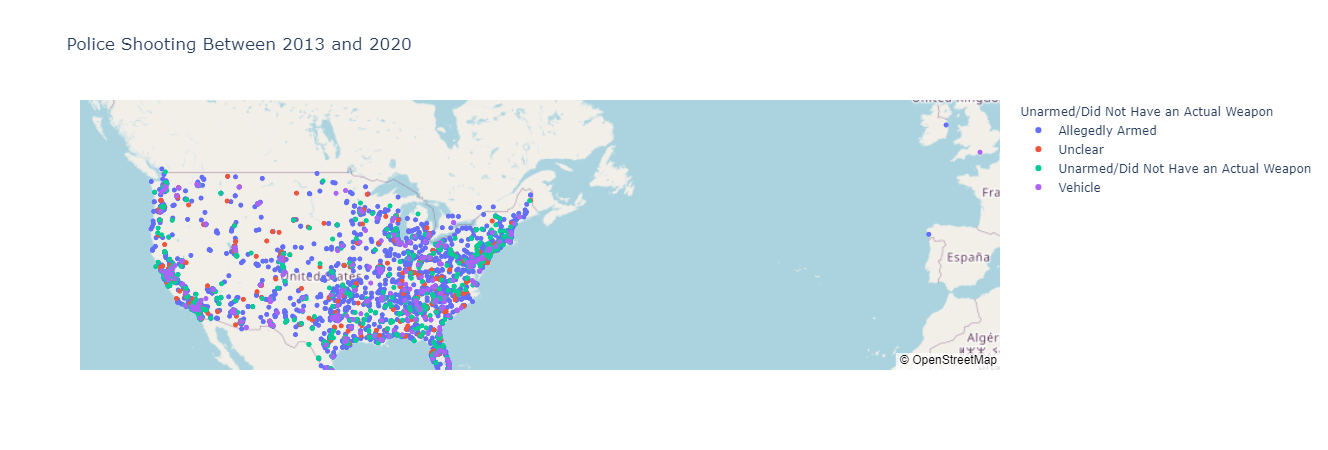

In [786]:
import plotly.graph_objects as go
import pandas as pd
start_date = "2013"
end_date = "2020"
mapbox_access_token = 'pk.eyJ1IjoicG9wa2RvZGdlIiwiYSI6ImNrZDdvZDFtbDAwNmwycW9xazQycWpldTYifQ.33ELrqLko1a0dHHEkSsxNw'


px.set_mapbox_access_token(mapbox_access_token)
fig = px.scatter_mapbox(df,
                        lat=df.lon,
                        lon=df.lat,
                        zoom=1,
                        hover_name= "Victim's name",
                        hover_data= ['Victim\'s age','Victim\'s gender','Victim\'s race',"State","City"],
                        color="Unarmed/Did Not Have an Actual Weapon",
                        title=f"Police Shooting Between {start_date} and {end_date}"
                       )
fig.update_layout(mapbox_style="open-street-map",
                  mapbox_zoom=3, mapbox_center = {"lat": 37.0902, "lon": -95.7129})
fig.show()

In [772]:
list(df.columns)

["Victim's name",
 "Victim's age",
 "Victim's gender",
 "Victim's race",
 'URL of image of victim',
 'Date of Incident (month/day/year)',
 'Street Address of Incident',
 'City',
 'State',
 'Zipcode',
 'County',
 'Agency responsible for death',
 'ORI Agency Identifier (if available)',
 'Cause of death',
 'A brief description of the circumstances surrounding the death',
 'Official disposition of death (justified or other)',
 'Criminal Charges?',
 'Link to news article or photo of official document',
 'Symptoms of mental illness?',
 'Unarmed/Did Not Have an Actual Weapon',
 'Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)',
 'Alleged Threat Level (Source: WaPo)',
 'Fleeing (Source: WaPo)',
 'Body Camera (Source: WaPo)',
 'WaPo ID (If included in WaPo database)',
 'Off-Duty Killing?',
 'Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )',
 

In [725]:
df.lat.dtype

dtype('O')

In [776]:
# Projected sample input
User_inputs = {"graph_type":"bar",
               "graph_topic":"incident"
               "start_date": "01/24/2017",
               "end_date": "01/24/2028",
               "Groupby": {"State": ["GA","FL","SC", "CA"]},
               "asc": True}

SyntaxError: invalid syntax (<ipython-input-776-d6b43f350269>, line 4)

In [837]:
def map_function(df, start_date, end_date, sort_by:str= "Armed/Unarmed"):
    # Selection of timeframes
    df = df.copy()
    mask =  (df['Date of Incident (month/day/year)'] > start_date) & ( df['Date of Incident (month/day/year)'] <= end_date)
    df = df.loc[mask]
    mapbox_access_token = 'pk.eyJ1IjoicG9wa2RvZGdlIiwiYSI6ImNrZDdvZDFtbDAwNmwycW9xazQycWpldTYifQ.33ELrqLko1a0dHHEkSsxNw'
    if sort_by == "Armed/Unarmed":
        color="Unarmed/Did Not Have an Actual Weapon"
    if sort_by == "Demographic":
        color="Victim's race"
    if sort_by == "Gender":
        color="Victim's gender"
    px.set_mapbox_access_token(mapbox_access_token)
    fig = px.scatter_mapbox(df,
                            lat=df.lon,
                            lon=df.lat,
                            zoom=1,
                            hover_name= "Victim's name",
                            hover_data= ['Victim\'s age','Victim\'s gender','Victim\'s race',"State","City"],
                            color = color,
                            title=f"Police Shooting Between {start_date} and {end_date}"
                           )
    fig.update_layout(mapbox_style="open-street-map",
                      mapbox_zoom=3, mapbox_center = {"lat": 37.0902, "lon": -95.7129})
    return fig.show()

    

In [831]:
df.to_csv("final.csv")

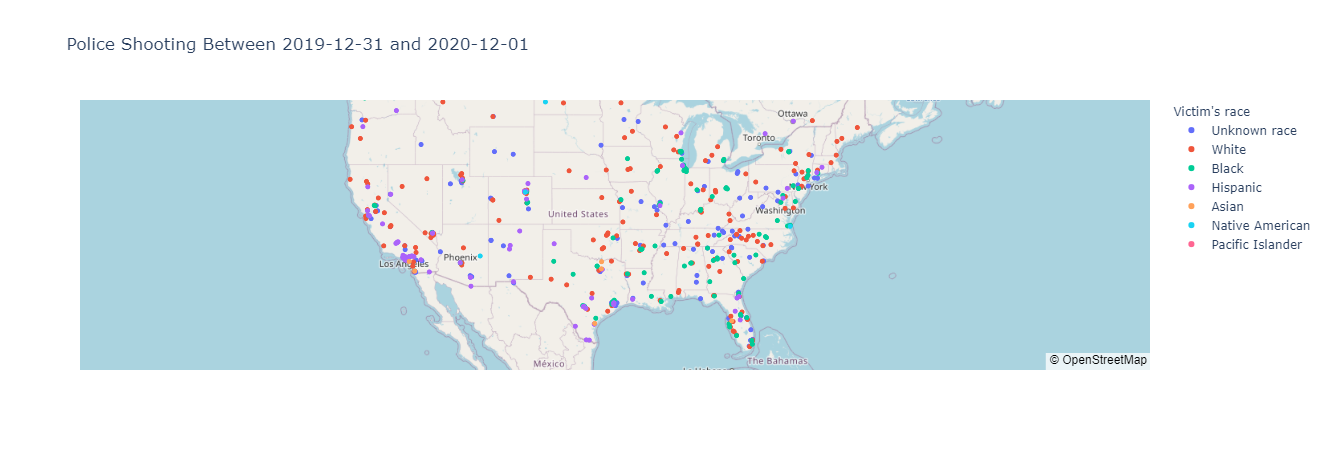

In [839]:
map_function(df, start_date, end_date,"Demographic")

In [808]:
dfc = df.copy()
mask =  (dfc['Date of Incident (month/day/year)'] > start_date) & ( dfc['Date of Incident (month/day/year)'] <= end_date)
dfc = dfc.loc[mask]

In [822]:
df["Victim\'s race"].replace(np.nan, "Unknown race",inplace=True)

In [828]:
df['Victim\'s gender'].value_counts(dropna=False)
df["Victim\'s gender"].replace(np.nan, "Unknown",inplace=True)

In [823]:
df["Victim\'s race"].replace(np.nan, "Unknown",inplace=True)

In [424]:
start_date = "2019-12-31"
end_date = "2020-12-01"

In [810]:
dfc

Victim's name Victim's age Victim's gender  \
870  Gerardo Antonio Conchas-Bustos           20            Male   
871     Teddy James Maverick Varner           29            Male   
872           Derrick A. Elseth Jr.           24            Male   
873       Gabriel Justin Strickland           25            Male   

    Victim's race                             URL of image of victim  \
870      Hispanic  https://fatalencounters.org/wp-content/uploads...   
871  Unknown race                                                NaN   
872         White                                                NaN   
873         White                                                NaN   

    Date of Incident (month/day/year) Street Address of Incident  \
870                        2020-01-01        901 South Irving St   
871                        2020-01-01          8000 Blackwell Rd   
872                        2020-01-01      1000 Finchs Hill Road   
873                        2020-01-01            10645 Walker Dr   

              City State  Zipcode    County  \
870         Denver    CO  80204.0    Denver   
871  Central Point    OR  97502.0   Jackson   
872         Warsaw    VA  22572.0  Richmond   
873   Grass Valley    CA  95945.0    Nevada   

                          Agency responsible for death  \
870                           Denver Police Department   
871                    Jackson County Sheriff's Office   
872  Richmond County Sheriff's Office, Virginia Sta...   
873  Nevada County Sheriff's Office, Grass Valley P...   

    ORI Agency Identifier (if available)  Cause of death  \
870                            CODPD0000         Gunshot   
871                            OR0150000         Gunshot   
872                  VA0790000;VAVSP0000         Gunshot   
873                  CA0290000;CA0290100  Gunshot, Taser   

    A brief description of the circumstances surrounding the death  \
870  Officers were called to a residence at 12:50 a...               
871  A person allegedly confronted an officer with ...               
872  Two Richmond County deputies and a state troop...               
873  Deputies and officers responded at 1 p.m. to r...               

    Official disposition of death (justified or other) Criminal Charges?  \
870             Pending investigation/No Known Charges  No known charges   
871             Pending investigation/No Known Charges  No known charges   
872             Pending investigation/No Known Charges  No known charges   
873             Pending investigation/No Known Charges  No known charges   

    Link to news article or photo of official document  \
870  https://denver.cbslocal.com/2020/01/01/denver-...   
871  https://www.kdrv.com/content/news/Blackwell-Rd...   
872  https://www.wric.com/news/virginia-news/suspec...   
873  https://fox40.com/2020/01/01/authorities-inves...   

    Symptoms of mental illness?  Unarmed/Did Not Have an Actual Weapon  \
870                          No                        Allegedly Armed   
871                         Yes                        Allegedly Armed   
872                          No                        Allegedly Armed   
873                         Yes  Unarmed/Did Not Have an Actual Weapon   

    Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)  \
870                                              knife                                
871                                                gun                                
872                                                gun                                
873                                         toy weapon                                

    Alleged Threat Level (Source: WaPo) Fleeing (Source: WaPo)  \
870                              attack            Not fleeing   
871                              attack            Not fleeing   
872                               other            Not fleeing   
873                              attack            Not fl

In [287]:
import pandas as pd

In [339]:
state_info = pd.read_csv("state_info.csv", index_col=[0])

In [340]:
state_info = state_info[["State Abbreviation", "Black Population",'Hispanic Population',
 'Native American Population',
 'Asian Population',
 'Pacific Islander Population',
 'White Population',
 'Other Population',]]

In [346]:
state_info

State  Black Population  Hispanic Population  Native American Population  \
0     AL         1285737.0             203146.0                     23243.0   
1     AK           22817.0              51186.0                    103506.0   
2     AZ          286614.0            2163312.0                    271946.0   
3     AR          458536.0             219052.0                     17342.0   
4     CA         2164519.0           15221577.0                    138427.0   
..   ...               ...                  ...                         ...   
46    VA         1582421.0             771177.0                     17747.0   
47    WA          259482.0             911573.0                     80274.0   
48    WV           65597.0              27522.0                      3546.0   
49    WI          361909.0             385779.0                     46149.0   
50    WY            5149.0              56966.0                     12717.0   

    Asian Population  Pacific Islander Population  White Population  \
0            63936.0                       1521.0         3196730.0   
1            45617.0                       8544.0          450754.0   
2           222477.0                      12523.0         3825886.0   
3            43441.0                       7877.0         2173849.0   
4          5525439.0                     138911.0        14695836.0   
..               ...                          ...               ...   
46          526973.0                       4740.0         5233111.0   
47          602020.0                      46476.0         5039208.0   
48           14353.0                        309.0         1684756.0   
49          158198.0                       1676.0         4711038.0   
50            4660.0                        434.0          489559.0   

    Other Population  
0            90367.0  
1            56092.0  
2           163927.0  
3            70574.0  
4          1264051.0  
..               ...  
46          277605.0  
47          355303.0  
48           32971.0  
49          113645.0  
50           12351.0  

[51 rows x 8 columns]

In [342]:
state_info.columns =['State', 'Black Population', 'Hispanic Population',
       'Native American Population', 'Asian Population',
       'Pacific Islander Population', 'White Population', 'Other Population']

In [378]:
state = state.set_index("State").T

KeyError: "None of ['State'] are in the columns"

In [373]:
state = state.reset_index()

In [383]:
new = new[['Black Population', 'Hispanic Population',
       'Native American Population', 'Asian Population',
       'Pacific Islander Population', 'White Population', 'Other Population']]

In [386]:
new.T.to_csv("State_Country_Pop.csv")

In [318]:
state_info.to_csv("State_info.csv")

In [303]:
v = "sdve"

In [304]:
type(v)

str

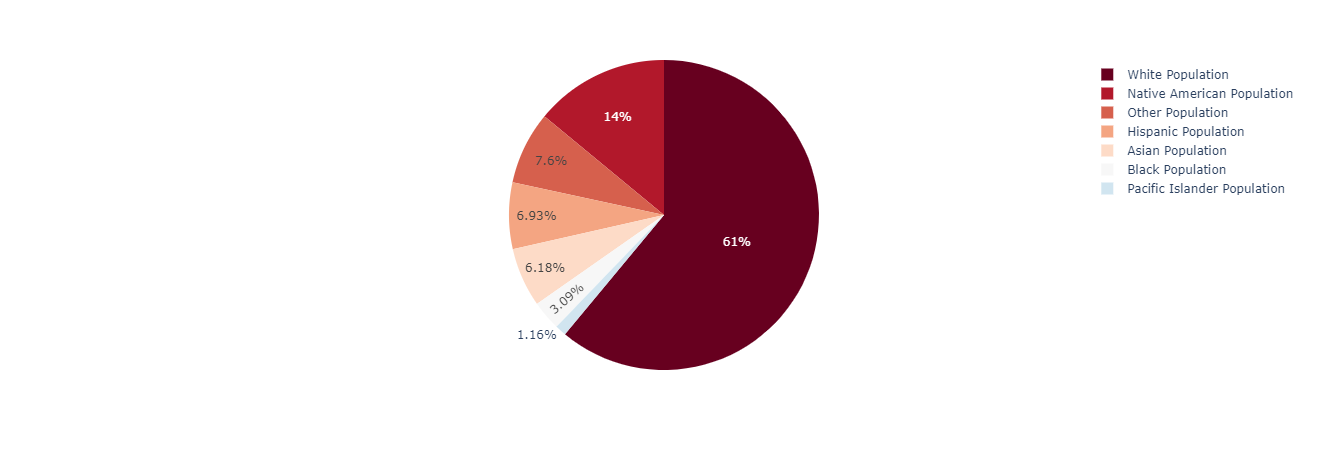

In [315]:
import plotly.express as px
fig = px.pie(state_info, values='AK', names='index', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [334]:
us_pop = pd.read_csv('state_info.csv', index_col=[0])

In [321]:
us_pop

State State Abbreviation  Total Population  Black Population  \
0         Alabama                 AL         4864680.0         1285737.0   
1          Alaska                 AK          738516.0           22817.0   
2         Arizona                 AZ         6946685.0          286614.0   
3        Arkansas                 AR         2990671.0          458536.0   
4      California                 CA        39148760.0         2164519.0   
..            ...                ...               ...               ...   
46       Virginia                 VA         8413774.0         1582421.0   
47     Washington                 WA         7294336.0          259482.0   
48  West Virginia                 WV         1829054.0           65597.0   
49      Wisconsin                 WI         5778394.0          361909.0   
50        Wyoming                 WY          581836.0            5149.0   

    Hispanic Population  Native American Population  Asian Population  \
0              203146.0                     23243.0           63936.0   
1               51186.0                    103506.0           45617.0   
2             2163312.0                    271946.0          222477.0   
3              219052.0                     17342.0           43441.0   
4            15221577.0                    138427.0         5525439.0   
..                  ...                         ...               ...   
46             771177.0                     17747.0          526973.0   
47             911573.0                     80274.0          602020.0   
48              27522.0                      3546.0           14353.0   
49             385779.0                     46149.0          158198.0   
50              56966.0                     12717.0            4660.0   

    Pacific Islander Population  White Population  Other Population  \
0                        1521.0         3196730.0           90367.0   
1                        8544.0          450754.0           56092.0   
2                       12523.0         3825886.0          163927.0   
3                        7877.0         2173849.0           70574.0   
4                      138911.0        14695836.0         1264051.0   
..                          ...               ...               ...   
46                       4740.0         5233111.0          277605.0   
47                      46476.0         5039208.0          355303.0   
48                        309.0         1684756.0           32971.0   
49                       1676.0         4711038.0          113645.0   
50                        434.0          489559.0           12351.0   

    Pop. Millions  
0             5.0  
1             1.0  
2             7.0  
3             3.0  
4            39.0  
..            ...  
46            8.0  
47            7.0  
48            2.0  
49            6.0  
50            1.0  

[51 rows x 11 columns]

In [332]:
state_pop = pd.read_csv("State_info.csv")

In [324]:
state_pop["Black Population"].sum()

39715917.0

In [595]:
d = {
    "State":"US",
    "Black Population": state_info["Black Population"].sum(),
    "Hispanic Population": state_info["Black Population"].sum(),
    "Asian Population": state_info["Asian Population"].sum(),
    "Pacific Islander Population": state_info["Pacific Islander Population"].sum(),
    "White Population": state_info["White Population"].sum(),
    "Native American Population": state_info["Native American Population"].sum(),
    "Other Population": state_info["Other Population"].sum()
}

In [599]:
d2 = {}

In [600]:
df2 = pd.DataFrame(data=d2, index=[0])

In [605]:
df2.to_json()

'{}'

In [604]:
type(df2)

pandas.core.frame.DataFrame

In [356]:
d = {
    "State":"US",
    "GhosT": state_info["Black Population"].sum()}

In [355]:
state_info["Black Population"].sum()

39715917.0

In [358]:
df = pd.DataFrame(data=d, index=[0])

In [359]:
df

State  Black Population  Hispanic Population  Asian Population  \
0    US        39715917.0           39715917.0        17367169.0   

   Pacific Islander Population  White Population  Native American Population  \
0                     525102.0       197181177.0                   2135479.0   

   Other Population  
0         8460251.0

In [362]:
state = state_info.append(df)

In [375]:
state

index State  Black Population  Hispanic Population  \
0       0    AL         1285737.0             203146.0   
1       1    AK           22817.0              51186.0   
2       2    AZ          286614.0            2163312.0   
3       3    AR          458536.0             219052.0   
4       4    CA         2164519.0           15221577.0   
..    ...   ...               ...                  ...   
47     47    WA          259482.0             911573.0   
48     48    WV           65597.0              27522.0   
49     49    WI          361909.0             385779.0   
50     50    WY            5149.0              56966.0   
51      0    US        39715917.0           39715917.0   

    Native American Population  Asian Population  Pacific Islander Population  \
0                      23243.0           63936.0                       1521.0   
1                     103506.0           45617.0                       8544.0   
2                     271946.0          222477.0                      12523.0   
3                      17342.0           43441.0                       7877.0   
4                     138427.0         5525439.0                     138911.0   
..                         ...               ...                          ...   
47                     80274.0          602020.0                      46476.0   
48                      3546.0           14353.0                        309.0   
49                     46149.0          158198.0                       1676.0   
50                     12717.0            4660.0                        434.0   
51                   2135479.0        17367169.0                     525102.0   

    White Population  Other Population  
0          3196730.0           90367.0  
1           450754.0           56092.0  
2          3825886.0          163927.0  
3          2173849.0           70574.0  
4         14695836.0         1264051.0  
..               ...               ...  
47         5039208.0          355303.0  
48         1684756.0           32971.0  
49         4711038.0          113645.0  
50          489559.0           12351.0  
51       197181177.0         8460251.0  

[52 rows x 9 columns]

In [392]:
df = pd.read_csv("State_Country_Pop.csv")

In [404]:
df.columns = ['Demographics', 'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC',
       'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
       'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'US']

In [413]:
def demographic_pie(df, user_input):
    fig = px.pie(df, values=user_input, names='Demographics', color_discrete_sequence=px.colors.qualitative.D3, title=f"Demographic of {user_input}")
    return fig.show()
    

In [418]:
df = pd.read_csv('State_Country_Pop.csv', index_col=[0])

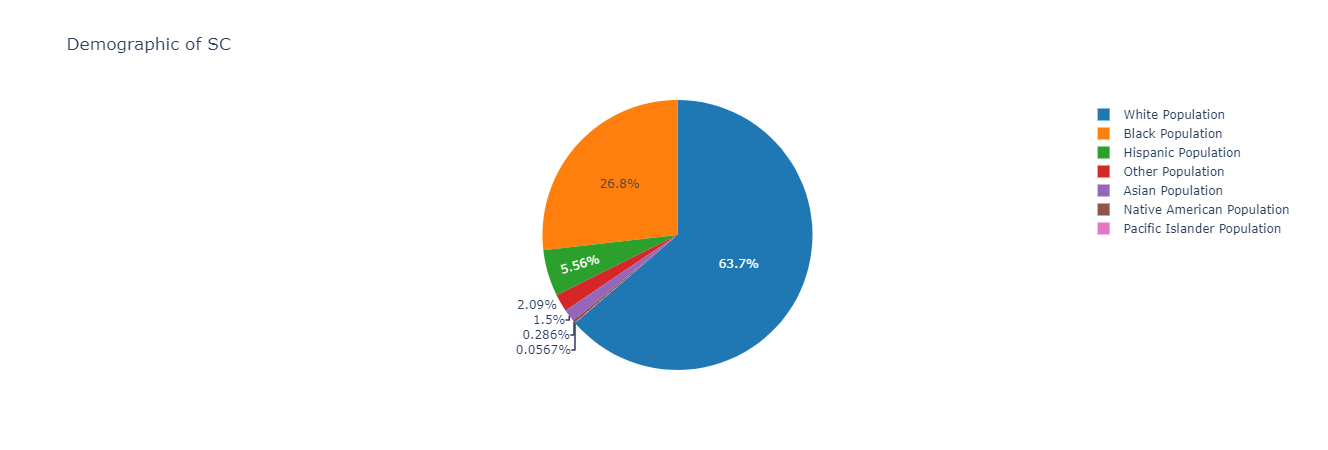

In [419]:
user_input = "SC"
demographic_pie(df, user_input)

In [369]:
state

State  Black Population  Hispanic Population  Native American Population  \
0     AL         1285737.0             203146.0                     23243.0   
1     AK           22817.0              51186.0                    103506.0   
2     AZ          286614.0            2163312.0                    271946.0   
3     AR          458536.0             219052.0                     17342.0   
4     CA         2164519.0           15221577.0                    138427.0   
..   ...               ...                  ...                         ...   
47    WA          259482.0             911573.0                     80274.0   
48    WV           65597.0              27522.0                      3546.0   
49    WI          361909.0             385779.0                     46149.0   
50    WY            5149.0              56966.0                     12717.0   
0     US        39715917.0           39715917.0                   2135479.0   

    Asian Population  Pacific Islander Population  White Population  \
0            63936.0                       1521.0         3196730.0   
1            45617.0                       8544.0          450754.0   
2           222477.0                      12523.0         3825886.0   
3            43441.0                       7877.0         2173849.0   
4          5525439.0                     138911.0        14695836.0   
..               ...                          ...               ...   
47          602020.0                      46476.0         5039208.0   
48           14353.0                        309.0         1684756.0   
49          158198.0                       1676.0         4711038.0   
50            4660.0                        434.0          489559.0   
0         17367169.0                     525102.0       197181177.0   

    Other Population  
0            90367.0  
1            56092.0  
2           163927.0  
3            70574.0  
4          1264051.0  
..               ...  
47          355303.0  
48           32971.0  
49          113645.0  
50           12351.0  
0          8460251.0  

[52 rows x 8 columns]

In [508]:
def pie_charts_vic(df, start_date:str, end_date:str, groupby, sort_by):
    # Selection of timeframes
    df = df.copy()
    mask =  (df['Date of Incident (month/day/year)'] > start_date) & ( df['Date of Incident (month/day/year)'] <= end_date)
    df = df.loc[mask]
    
    if "National" in groupby:
        df = df[sort_by].value_counts(10).sort_values(ascending=asc).rename_axis(sort_by).reset_index(name='Percentage')
        labels = df[sort_by]
        values = df["Percentage"]
        fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                                     insidetextorientation='radial'
                                    )])
        fig.update_layout(
            title=f"Percent of {sort_by}",
            xaxis_title="X Axis Title",
            yaxis_title="X Axis Title",
            font=dict(
                family="Courier New, monospace",
                size=12,
                color="RebeccaPurple"))
        return fig.show()
    if "States" in groupby:
        df = df.loc[df['State'].isin(groupby["States"])]
        df = df[sort_by].value_counts(10).sort_values(ascending=asc).rename_axis(sort_by).reset_index(name='Percentage')
        labels = df[sort_by]
        values = df["Percentage"]
        fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                                     insidetextorientation='radial',
                                    )])
        fig.update_layout(
            title=f"Percent of {sort_by}",
            xaxis_title="X Axis Title",
            yaxis_title="X Axis Title",
            font=dict(
                family="Courier New, monospace",
                size=12,
                color="RebeccaPurple"))
        return fig.show()         
    if "City" in groupby:
        df = df.loc[df['City_State'].isin(groupby["City"])]
        df = df[sort_by].value_counts(10).sort_values(ascending=asc).rename_axis(sort_by).reset_index(name='Percentage')
        labels = df[sort_by]
        values = df["Percentage"]
        fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                                     insidetextorientation='radial'
                                    )]) 
        fig.update_layout(
            title=f"Percent of {sort_by}",
            xaxis_title="X Axis Title",
            yaxis_title="X Axis Title",
            font=dict(
                family="Courier New, monospace",
                size=12,
                color="RebeccaPurple"))
        return fig.show()
    return "No Selection or invalid inputs"

In [509]:
df = pd.read_csv("final.csv", index_col=[0])

In [510]:
df.columns

Index(['Victim's name', 'Victim's age', 'Victim's gender', 'Victim's race',
       'URL of image of victim', 'Date of Incident (month/day/year)',
       'Street Address of Incident', 'City', 'State', 'Zipcode', 'County',
       'Agency responsible for death', 'ORI Agency Identifier (if available)',
       'Cause of death',
       'A brief description of the circumstances surrounding the death',
       'Official disposition of death (justified or other)',
       'Criminal Charges?',
       'Link to news article or photo of official document',
       'Symptoms of mental illness?', 'Unarmed/Did Not Have an Actual Weapon',
       'Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)',
       'Alleged Threat Level (Source: WaPo)', 'Fleeing (Source: WaPo)',
       'Body Camera (Source: WaPo)', 'WaPo ID (If included in WaPo database)',
       'Off-Duty Killing?',
       'Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-co

In [511]:
df[df["Victim's gender"]== "Male "].index

Int64Index([39], dtype='int64')

In [480]:
df["Victim's gender"].replace("Male ", "Male", inplace=True)

In [498]:
df.columns = ['Victim\'s name', 'Victim\'s age', 'Victim\'s gender', 'Victim\'s race',
       'URL of image of victim', 'Date of Incident (month/day/year)',
       'Street Address of Incident', 'City', 'State', 'Zipcode', 'County',
       'Agency responsible for death', 'ORI Agency Identifier (if available)',
       'Cause of death',
       'A brief description of the circumstances surrounding the death',
       'Official disposition of death (justified or other)',
       'Criminal Charges?',
       'Link to news article or photo of official document',
       'Symptoms of mental illness?', 'Unarmed/Did Not Have an Actual Weapon',
       'Alleged Weapon',
       'Alleged Threat Level', 'Fleeing',
       'Body Camera', 'WaPo ID (If included in WaPo database)',
       'Off-Duty Killing?',
       'Geography',
       'MPV ID', 'Fatal Encounters ID', 'City_State', 'Adress', 'location',
       'point', 'lon', 'lat', 'month_year']

In [513]:
df.to_csv("final.csv")

In [552]:
start_date = "2011-01-24"
end_date = "2028-01-24"
groupby_nat = {"National":None}
groupby_st = {"States":["GA","FL","SC", "CA", "PA"]}
groupby_zip = {"Zipcode": [77414.0, 34614.0]}
groupby_cit = {"City": ["Emmitsburg, MD", 'Coram, NY', 'Tooele, UT']}
sort_by ='Unarmed/Did Not Have an Actual Weapon'

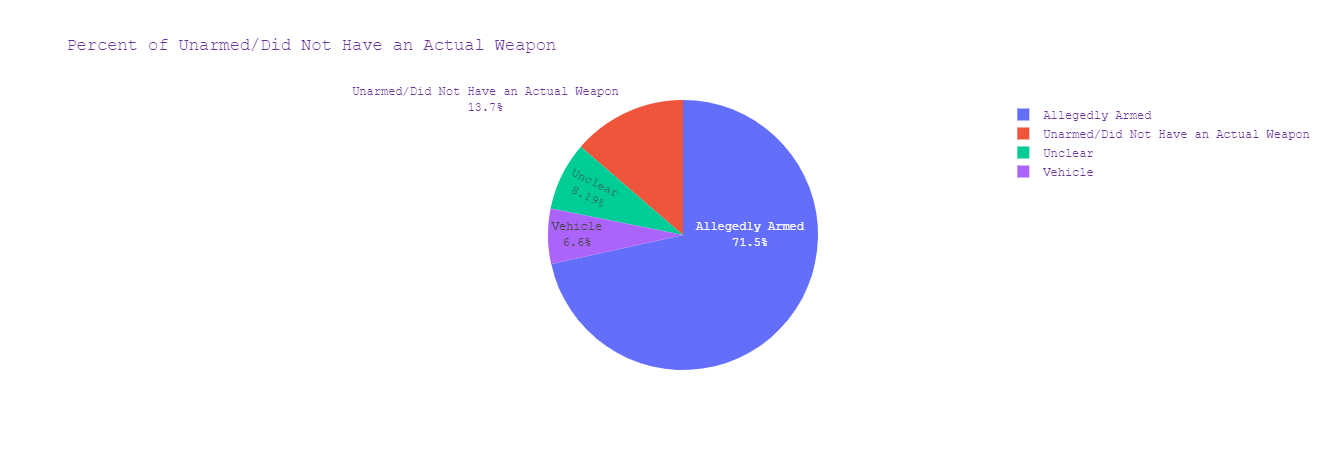

In [512]:
pie_charts_vic(df, start_date, end_date, groupby_nat, sort_by)

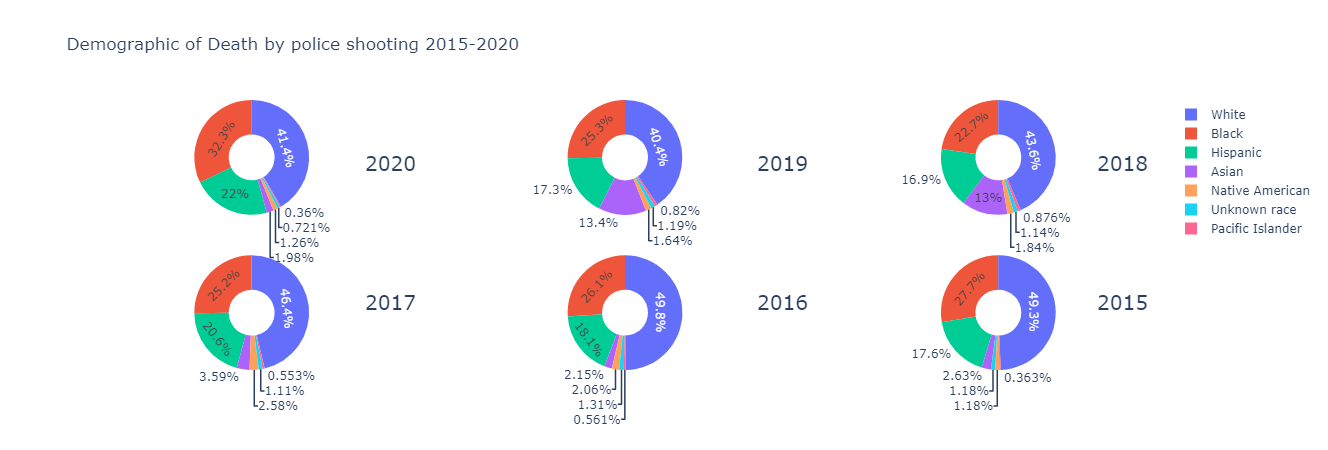

In [542]:
labels = df2015["Demographic"]
from plotly.subplots import make_subplots

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=2, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}],[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=df2020['Percentage'], name="2020"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=df2019['Percentage'], name="2019"),
              1, 2)
fig.add_trace(go.Pie(labels=labels, values=df2018['Percentage'], name="2018"),
              1, 3)
fig.add_trace(go.Pie(labels=labels, values=df2017['Percentage'], name="2017"),
              2, 1)
fig.add_trace(go.Pie(labels=labels, values=df2016['Percentage'], name="2016"),
              2, 2)
fig.add_trace(go.Pie(labels=labels, values=df2015['Percentage'], name="2015"),
              2, 3)
# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Demographic of Death by police shooting 2015-2020",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='2020', x=0.25, y=0.82, font_size=20, showarrow=False),
                 dict(text='2019', x=0.65, y=0.82, font_size=20, showarrow=False),
                 dict(text='2015', x=1.0, y=0.2, font_size=20, showarrow=False),
                 dict(text='2017', x=0.25, y=0.2, font_size=20, showarrow=False),
                 dict(text='2016', x=0.65, y=0.2, font_size=20, showarrow=False),
                 dict(text='2018', x=1.0, y=0.82, font_size=20, showarrow=False)])
fig.show()

In [570]:
# Test inputs 
start_date = "2017-01-01"
end_date = "2028-01-24"
groupby_nat = {"National":True}
groupby_st = {"States":["GA","FL","SC", "CA", "PA"]}
groupby_zip = {"Zipcode": [77414.0, 34614.0]}
groupby_cit = {"City": ["Atlanta,GA"]}
asc = True

In [555]:
def bar_incident(df, start_date:str, end_date:str, groupby,asc=True):
    """
    This function serves to generate bar graphs that represent rate of deadly police shooting
    with filter that is determined by user inputs.
    
    The function can take in certian start and end_date and limit the data representation to those
    stated timeframes.
    
    This funcation can group the data set to show the graph represending user specific Zipcodes and States.
    """
    df = df.copy()
    mask =  (df['Date of Incident (month/day/year)'] > start_date) & ( df['Date of Incident (month/day/year)'] <= end_date)
    df = df.loc[mask]
    
    if "National" in groupby:
        test_df = df['State'].value_counts().sort_values(ascending=asc).rename_axis('State').reset_index(name='counts')
        fig = px.bar(test_df, x="State", y="counts", title="Number of People killed by police Nationally", color="State")
        return fig.show()
    if "States" in groupby:
        test_df = df.loc[df["State"].isin(groupby["States"])]
        test_df = test_df['State'].value_counts().sort_values(ascending=asc).rename_axis('State').reset_index(name='counts')
        fig = px.bar(test_df, x="State", y="counts", title="Number of People killed by police in the Selected States", color="State")
        return fig.show()          
    if "Zipcode" in groupby:
        test_df = df.loc[df["Zipcode"].isin(groupby["Zipcode"])]
        test_df = test_df['Zipcode'].value_counts().sort_values(ascending=asc).rename_axis('Zipcode').reset_index(name='counts')
        test_df['Zipcode'] = test_df["Zipcode"].astype(int)
        test_df['Zipcode'] = test_df["Zipcode"].astype(str)
        fig = px.bar(test_df, x="Zipcode", y="counts", title="Number of People killed by police in the Zipcode", color="Zipcode")
        return fig.show()  
    if "City" in groupby:
        test_df = df.loc[df["CityState"].isin(groupby["City"])]
        test_df = test_df['CityState'].value_counts().sort_values(ascending=asc).rename_axis('CityState').reset_index(name='counts')
        fig = px.bar(test_df, x="CityState", y="counts", title="Number of People killed by police in the selected City", color="CityState")
        return fig.show()    
    
    return "No Selection or invalid inputs"

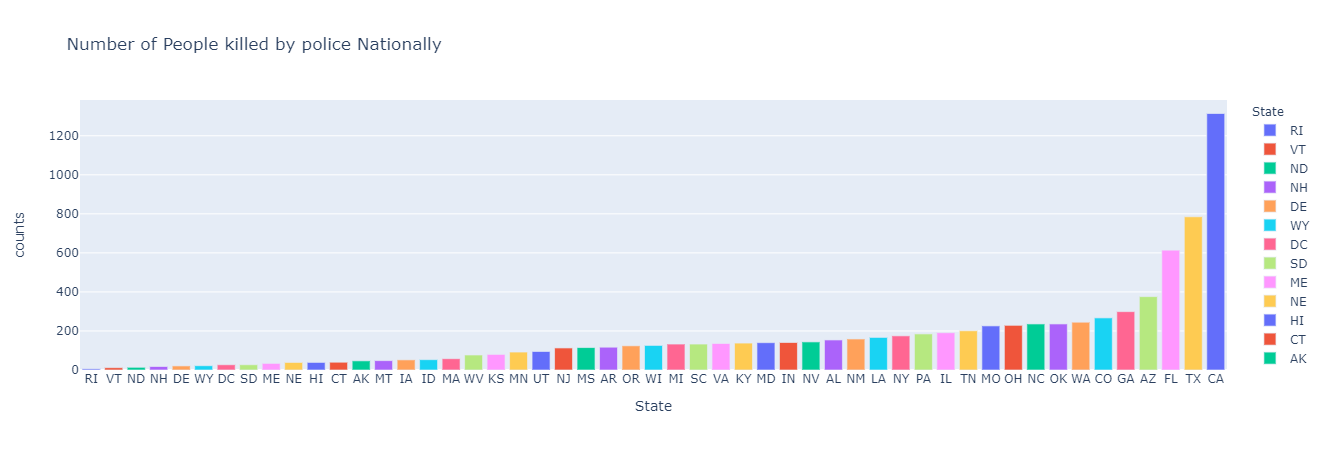

In [556]:
test_df = bar_incident(df, start_date, end_date, groupby_nat)

In [545]:
def map_function(df, start_date, end_date, sort_by:str= "Armed/Unarmed"):
    # Selection of timeframes
    df = df.copy()
    mask =  (df['Date of Incident (month/day/year)'] > start_date) & ( df['Date of Incident (month/day/year)'] <= end_date)
    df = df.loc[mask]
    mapbox_access_token = 'pk.eyJ1IjoicG9wa2RvZGdlIiwiYSI6ImNrZDdvZDFtbDAwNmwycW9xazQycWpldTYifQ.33ELrqLko1a0dHHEkSsxNw'
    if sort_by == "Armed/Unarmed":
        color="Unarmed/Did Not Have an Actual Weapon"
    if sort_by == "Demographic":
        color="Victim's race"
    if sort_by == "Gender":
        color="Victim's gender"
    px.set_mapbox_access_token(mapbox_access_token)
    fig = px.scatter_mapbox(df,
                            lat=df.lon,
                            lon=df.lat,
                            zoom=1,
                            hover_name= "Victim's name",
                            hover_data= ['Victim\'s age','Victim\'s gender','Victim\'s race',"State","City"],
                            color = color,
                            title=f"Police Shooting Between {start_date} and {end_date}"
                           )
    fig.update_layout(mapbox_style="open-street-map",
                      mapbox_zoom=3, mapbox_center = {"lat": 37.0902, "lon": -95.7129})
    return fig.show()

    

In [546]:
def demographic_pie(df, user_input):
    fig = px.pie(df, values=user_input, names='Demographics', color_discrete_sequence=px.colors.qualitative.D3, title=f"Demographic of {user_input}")
    return fig.show()

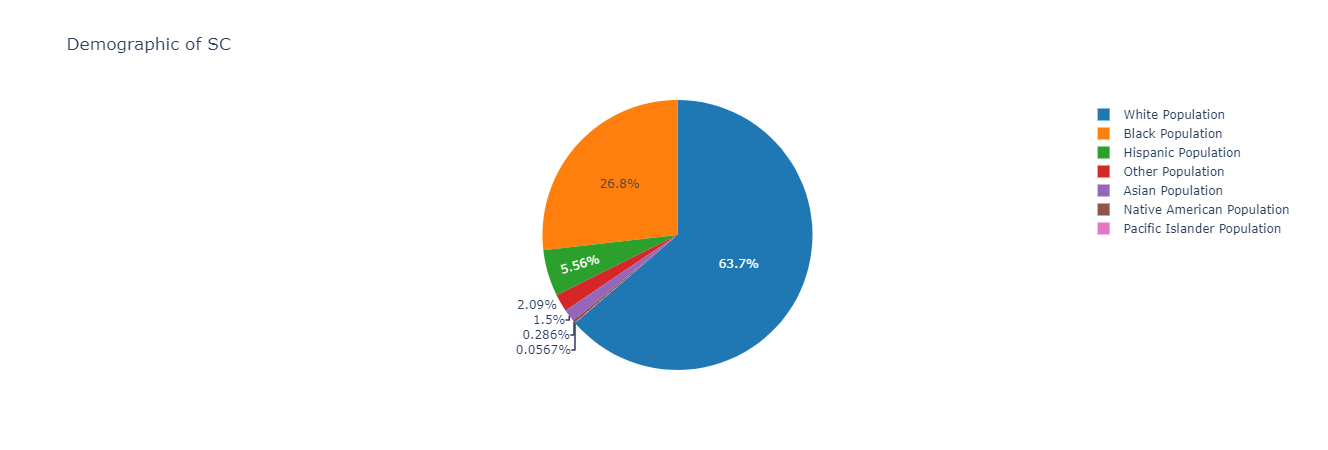

In [548]:
user_input = "SC"
st = pd.read_csv('State_Country_Pop.csv', index_col=[0])
demographic_pie(st, user_input)

In [594]:
st

Demographics         AL        AK         AZ         AR  \
0             Black Population  1285737.0   22817.0   286614.0   458536.0   
1          Hispanic Population   203146.0   51186.0  2163312.0   219052.0   
2   Native American Population    23243.0  103506.0   271946.0    17342.0   
3             Asian Population    63936.0   45617.0   222477.0    43441.0   
4  Pacific Islander Population     1521.0    8544.0    12523.0     7877.0   
5             White Population  3196730.0  450754.0  3825886.0  2173849.0   
6             Other Population    90367.0   56092.0   163927.0    70574.0   

           CA         CO         CT        DE        DC          FL  \
0   2164519.0   216732.0   351817.0  204665.0  315281.0   3167011.0   
1  15221577.0  1184794.0   561791.0   86315.0   74776.0   5184720.0   
2    138427.0    30131.0     5320.0    2851.0    1314.0     41776.0   
3   5525439.0   169556.0   157406.0   36464.0   26278.0    548642.0   
4    138911.0     7480.0      752.0     276.0     280.0     10770.0   
5  14695836.0  3778212.0  2418696.0  595623.0  248057.0  11196857.0   
6   1264051.0   144236.0    85722.0   23301.0   18512.0    448363.0   

          GA        HI         ID         IL         IN         IA         KS  \
0  3195363.0   24472.0    10739.0  1796057.0   610343.0   107471.0   163713.0   
1   968463.0  147962.0   209073.0  2174842.0   450267.0   183296.0   340616.0   
2    18416.0    1877.0    18775.0    15037.0    12125.0     9067.0    19504.0   
3   399223.0  522731.0    22809.0   685343.0   143883.0    74640.0    82887.0   
4     5070.0  132583.0     2348.0     3088.0     2133.0     2863.0     1827.0   
5  5476441.0  314536.0  1387654.0  7894286.0  5275162.0  2695888.0  2214543.0   
6   234508.0  277868.0    36411.0   252844.0   143513.0    59274.0    85686.0   

          KY         LA         ME         MD         MA         MI  \
0   349407.0  1492230.0    16990.0  1759438.0   463796.0  1360345.0   
1   158744.0   234920.0    21421.0   588912.0   789127.0   497897.0   
2     8498.0    24014.0     7722.0    10949.0     8890.0    45772.0   
3    62432.0    79137.0    14814.0   371981.0   440336.0   303059.0   
4     2339.0     1154.0      258.0     2265.0     1698.0     2464.0   
5  3764082.0  2744265.0  1244525.0  3084868.0  4930412.0  7489371.0   
6    94702.0    87896.0    27083.0   185022.0   195934.0   258580.0   

          MN         MS         MO        MT         NE         NV         NH  \
0   336505.0  1121752.0   699730.0    4348.0    88442.0   249967.0    17622.0   
1   292764.0    90493.0   249105.0   39019.0   203281.0   831597.0    48356.0   
2    53168.0    12990.0    23566.0   64643.0    13918.0    26355.0     1838.0   
3   260797.0    28170.0   115311.0    7806.0    43839.0   229928.0    35848.0   
4     1799.0      654.0     6037.0     706.0     1091.0    17703.0      270.0   
5  4438071.0  1696952.0  4848330.0  898953.0  1512314.0  1458093.0  1214547.0   
6   144254.0    37751.0   147983.0   26257.0    41875.0   109206.0    25141.0   

          NJ         NM          NY         NC        ND         OH  \
0  1129257.0    38016.0   2808679.0  2146254.0   20113.0  1418048.0   
1  1768020.0  1015751.0   3705588.0   935950.0   26529.0   431327.0   
2     9599.0   183408.0     46139.0   111360.0   38308.0    17723.0   
3   826944.0    29571.0   1616028.0   280059.0   10664.0   247987.0   
4     2255.0     1046.0      5591.0     5677.0     366.0     3055.0   
5  4960005.0   788308.0  10959534.0  6433039.0  639477.0  9220638.0   
6   185765.0    36334.0    476894.0   243285.0   16744.0   303101.0   

          OK         OR         PA        RI         SC        SD         TN  \
0   282622.0    74356.0  1360576.0   59001.0  1328352.0   15840.0  1107218.0   
1   407521.0   523956.0   905156.0  158858.0   275685.0   31995.0   352402.0   
2   280638.0    36776.0    14419.0    3708.0    14187.0   72263.0    15172.0   
3    82318.0   172505.0   424597.0   35128.0    74278.0   12540.0   112015.0

In [549]:
def map_function(df, start_date, end_date, sort_by:str= "Armed/Unarmed"):
    # Selection of timeframes
    df = df.copy()
    mask =  (df['Date of Incident (month/day/year)'] > start_date) & ( df['Date of Incident (month/day/year)'] <= end_date)
    df = df.loc[mask]
    mapbox_access_token = 'pk.eyJ1IjoicG9wa2RvZGdlIiwiYSI6ImNrZDdvZDFtbDAwNmwycW9xazQycWpldTYifQ.33ELrqLko1a0dHHEkSsxNw'
    if sort_by == "Armed/Unarmed":
        color="Unarmed/Did Not Have an Actual Weapon"
    if sort_by == "Demographic":
        color="Victim's race"
    if sort_by == "Gender":
        color="Victim's gender"
    px.set_mapbox_access_token(mapbox_access_token)
    fig = px.scatter_mapbox(df,
                            lat=df.lon,
                            lon=df.lat,
                            zoom=1,
                            hover_name= "Victim's name",
                            hover_data= ['Victim\'s age','Victim\'s gender','Victim\'s race',"State","City"],
                            color = color,
                            title=f"Police Shooting Between {start_date} and {end_date}"
                           )
    fig.update_layout(mapbox_style="open-street-map",
                      mapbox_zoom=3, mapbox_center = {"lat": 37.0902, "lon": -95.7129})
    return fig.show()    

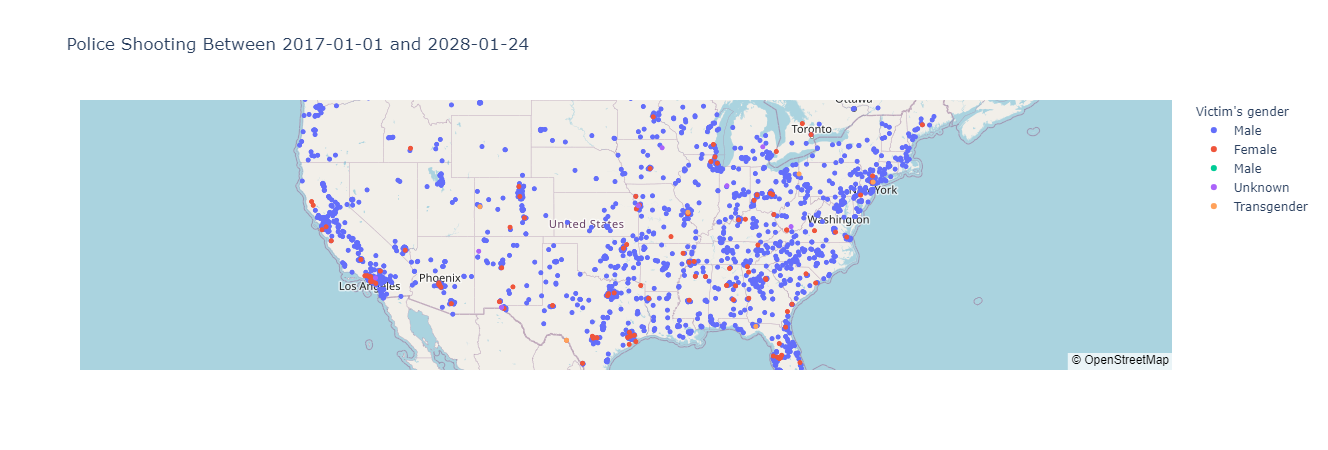

In [592]:
map_function(df, start_date, end_date,"Gender")

In [590]:

df = pd.read_csv('https://raw.githubusercontent.com/popkdodge/Dataset-Holder/main/final.csv', index_col=[0])
state_pop = pd.read_csv("https://raw.githubusercontent.com/popkdodge/Dataset-Holder/main/state_pop.csv", index_col=[0])

## Functions
def bar_incident(state_pop, df, start_date:str, end_date:str, groupby,asc=True):
    """
    This function serves to generate bar graphs that represent rate of deadly police shooting
    with filter that is determined by user inputs.
    
    The function can take in certian start and end_date and limit the data representation to those
    stated timeframes.
    
    This funcation can group the data set to show the graph represending user specific Zipcodes and States.
    """
    groupby = groupby
    state = state_pop.copy()
    df = df.copy()
    mask =  (df['Date of Incident (month/day/year)'] > start_date) & ( df['Date of Incident (month/day/year)'] <= end_date)
    df = df.loc[mask]
    if "National" in groupby:
        test_df = df['State'].value_counts().sort_values(ascending=asc).rename_axis('State').reset_index(name='counts')
        fin = pd.merge(state_pop, test_df, how="inner", on="State")
        fin['count/popPermillions'] = round(fin["counts"]/fin["Pop. Millions"])
        fin = fin.sort_values(by="count/popPermillions")
        fig = px.bar(fin, x="State", y="count/popPermillions", title="Number of People killed by police in the Selected States", color="State")
        return fig.show()
    if "States" in groupby:
        test_df = df.loc[df["State"].isin(groupby["States"])]
        test_df = test_df['State'].value_counts().sort_values(ascending=asc).rename_axis('State').reset_index(name='counts')
        fin = pd.merge(state_pop, test_df, how="inner", on="State")
        fin['count/popPermillions'] = round(fin["counts"]/fin["Pop. Millions"])
        fin = fin.sort_values(by="count/popPermillions")
        fig = px.bar(fin, x="State", y="count/popPermillions", title="Number of People killed by police in the Selected States", color="State")
        return fig.show()          
    if "Zipcode" in groupby:
        test_df = df.loc[df["Zipcode"].isin(groupby["Zipcode"])]
        test_df = test_df['Zipcode'].value_counts().sort_values(ascending=asc).rename_axis('Zipcode').reset_index(name='counts')
        test_df['Zipcode'] = test_df["Zipcode"].astype(int)
        test_df['Zipcode'] = test_df["Zipcode"].astype(str)
        fig = px.bar(test_df, x="Zipcode", y="counts", title="Number of People killed by police in the Zipcode", color="Zipcode")
        return fig.show()  
    if "City" in groupby:
        test_df = df.loc[df["CityState"].isin(groupby["City"])]
        test_df = test_df['CityState'].value_counts().sort_values(ascending=asc).rename_axis('CityState').reset_index(name='counts')
        fig = px.bar(test_df, x="CityState", y="counts", title="Number of People killed by police in the selected City", color="CityState")
        return fig.show()    
    
    return "No Selection or invalid inputs"

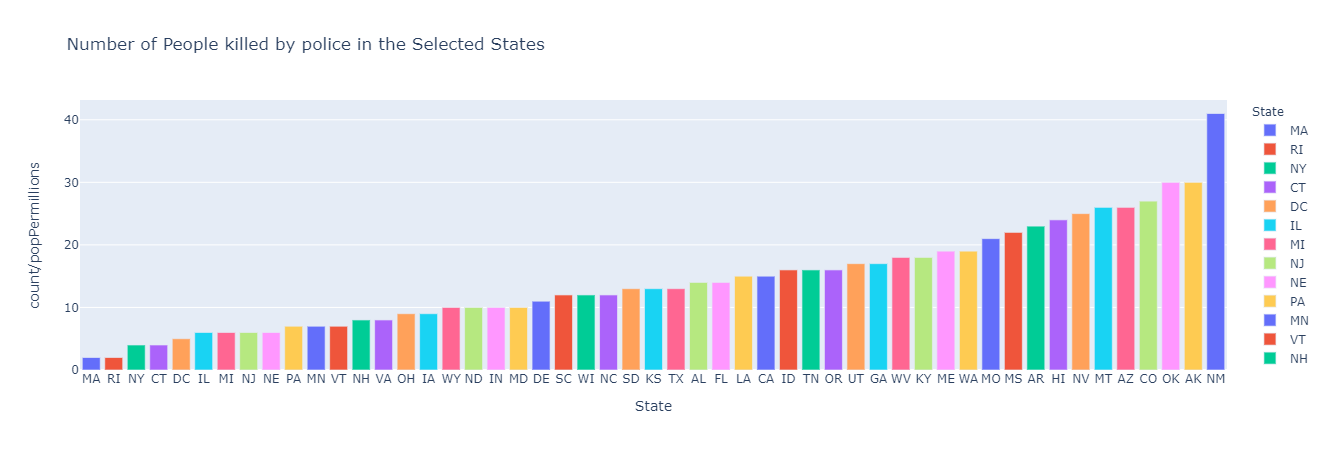

In [593]:
group_by = {"National":True}
bar_incident(state_pop, df, start_date, end_date, groupby_nat,asc)


In [617]:
def bar_incident(state_pop, df, start_date:str, end_date:str, groupby,asc=True):
    """
    This function serves to generate bar graphs that represent rate of deadly police shooting
    with filter that is determined by user inputs.
    
    The function can take in certian start and end_date and limit the data representation to those
    stated timeframes.
    
    This funcation can group the data set to show the graph represending user specific Zipcodes and States.
    """
    groupby = groupby
    state = state_pop.copy()
    df = df.copy()
    mask =  (df['Date of Incident (month/day/year)'] > start_date) & ( df['Date of Incident (month/day/year)'] <= end_date)
    df = df.loc[mask]
    if "National" in groupby:
        test_df = df['State'].value_counts().sort_values(ascending=asc).rename_axis('State').reset_index(name='counts')
        fin = pd.merge(state_pop, test_df, how="inner", on="State")
        fin['count/popPermillions'] = round(fin["counts"]/fin["Pop. Millions"])
        fin = fin.sort_values(by="count/popPermillions")
        try:
            fig = px.bar(fin, x="State", y="count/popPermillions", title="Number of People killed by police in the Selected States", color="State")
        except:
            return {"Error": "Invalid inputs."}
        return fig.to_json()
    if "States" in groupby:
        test_df = df.loc[df["State"].isin(groupby["States"])]
        if test_df.to_json() == "{}":
            return {"Error":"Invalid user inputs"}
        test_df = test_df['State'].value_counts().sort_values(ascending=asc).rename_axis('State').reset_index(name='counts')
        fin = pd.merge(state_pop, test_df, how="inner", on="State")
        fin['count/popPermillions'] = round(fin["counts"]/fin["Pop. Millions"])
        fin = fin.sort_values(by="count/popPermillions")
        try:
            fig = px.bar(fin, x="State", y="count/popPermillions", title="Number of People killed by police in the Selected States", color="State")
        except:
            return {"Error": "No incident for the selected states"}
        return fig.to_json()          
    if "Zipcode" in groupby:
        test_df = df.loc[df["Zipcode"].isin(groupby["Zipcode"])]
        test_df = test_df['Zipcode'].value_counts().sort_values(ascending=asc).rename_axis('Zipcode').reset_index(name='counts')
        test_df['Zipcode'] = test_df["Zipcode"].astype(int)
        test_df['Zipcode'] = test_df["Zipcode"].astype(str)
        try:
            fig = px.bar(test_df, x="Zipcode", y="counts", title="Number of People killed by police in the Zipcode", color="Zipcode")
        except:
            return {"Error": "No incident for the selected zipcode"}
        return fig.to_json()  
    if "City" in groupby:
        test_df = df.loc[df["CityState"].isin(groupby["City"])]
        test_df = test_df['CityState'].value_counts().sort_values(ascending=asc).rename_axis('CityState').reset_index(name='counts')
        try:
            fig = px.bar(test_df, x="CityState", y="counts", title="Number of People killed by police in the selected City", color="CityState")
        except:
            return {"Error": "No incident for the selected City"}
        return fig.to_json()    
    
    return "No Selection or invalid inputs"


In [619]:
start_date = "2013-01-01"
end_date = "2025-01-01"

In [ ]:
df

In [612]:
groupby

{'National': ['CA']}

In [620]:
bar_incident(state_pop, df, start_date, end_date, groupby,asc=True)

'{"data":[{"alignmentgroup":"True","hovertemplate":"State=%{x}<br>count/popPermillions=%{y}<extra></extra>","legendgroup":"RI","marker":{"color":"#636efa"},"name":"RI","offsetgroup":"RI","orientation":"v","showlegend":true,"textposition":"auto","type":"bar","x":["RI"],"xaxis":"x","y":[6.0],"yaxis":"y"},{"alignmentgroup":"True","hovertemplate":"State=%{x}<br>count/popPermillions=%{y}<extra></extra>","legendgroup":"MA","marker":{"color":"#EF553B"},"name":"MA","offsetgroup":"MA","orientation":"v","showlegend":true,"textposition":"auto","type":"bar","x":["MA"],"xaxis":"x","y":[8.0],"yaxis":"y"},{"alignmentgroup":"True","hovertemplate":"State=%{x}<br>count/popPermillions=%{y}<extra></extra>","legendgroup":"NY","marker":{"color":"#00cc96"},"name":"NY","offsetgroup":"NY","orientation":"v","showlegend":true,"textposition":"auto","type":"bar","x":["NY"],"xaxis":"x","y":[9.0],"yaxis":"y"},{"alignmentgroup":"True","hovertemplate":"State=%{x}<br>count/popPermillions=%{y}<extra></extra>","legendgro

In [691]:
A= [[1,2,3],[4,5,6],[7,8,9]]

In [690]:
def rotate_matrix(A):
    size = len(A)
    g = {}
    for i in range(size):
        g[i] = []
    for row, array in enumerate(A):
        for index,col in enumerate(array):
            g[index].append(col)
    for i in range(size):
        g[i] = g[i][::-1]
    B = []
    for i in range(size):
        B.append(g[i])
    return B

In [687]:
for i in range(size):
    g[i] = g[i][::-1]

In [689]:
B = []
for i in range(size):
    B.append(g[i])

In [692]:
rotate_matrix(A)

[[7, 4, 1], [8, 5, 2], [9, 6, 3]]

In [640]:
i[::-1]

[7, 4, 1]

In [693]:
A = [[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]]

In [694]:
rotate_matrix(A)

[[13, 9, 5, 1], [14, 10, 6, 2], [15, 11, 7, 3], [16, 12, 8, 4]]